In [243]:
import pandas as pd
import numpy as np

import dask
import dask.dataframe as dd
from dask.delayed import delayed

In [244]:
parts = dask.delayed(pd.read_excel)("lotofacil.xlsx")
lotofacil = dd.from_delayed(parts)

In [245]:
lotofacil['Concurso_2'] = lotofacil['Concurso'] 
lotofacil = lotofacil.set_index('Concurso_2')#sort_values(by='Concurso', ascending=True).reset_index(drop=True)

In [246]:
lotofacil = lotofacil.compute()

In [247]:
lotofacil = lotofacil.iloc[:-46]

In [248]:
lotofacil

,Concurso,Data,bola_1,bola_2,bola_3,bola_4,bola_5,bola_6,bola_7,bola_8,bola_9,bola_10,bola_11,bola_12,bola_13,bola_14,bola_15
Concurso_2,,,,,,,,,,,,,,,,,
1,1,29/09/2003,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3
2,2,06/10/2003,23,15,5,4,12,16,20,6,11,19,24,1,9,13,7
3,3,13/10/2003,20,23,12,8,6,1,7,11,14,4,16,10,9,17,24
4,4,20/10/2003,16,5,25,24,23,8,12,2,17,18,1,10,4,19,13
5,5,27/10/2003,15,13,20,2,11,24,9,16,4,23,25,12,8,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,1940,13/03/2020,23,13,12,1,11,15,24,21,22,5,25,10,17,8,18
1941,1941,16/03/2020,8,24,12,3,16,20,5,22,17,25,1,13,4,14,10
1942,1942,18/03/2020,1,24,18,25,15,20,3,2,10,13,12,7,11,4,8


In [249]:
def jogos_ordenados(bola_1: int, bola_2: int, bola_3: int, bola_4: int, bola_5: int, bola_6: int,
          bola_7: int, bola_8: int, bola_9: int, bola_10: int, bola_11: int, bola_12: int, 
          bola_13: int, bola_14: int, bola_15: int, ) -> list:
    """Retorna os 15 numeros do resultado da lotofacil, ordenados"""
    return sorted([bola_1, bola_2, bola_3, bola_4, bola_5, bola_6, 
                   bola_7, bola_8, bola_9, bola_10, bola_11, bola_12,
                   bola_13, bola_14, bola_15])

def jogos_desordenados(bola_1: int, bola_2: int, bola_3: int, bola_4: int, bola_5: int, bola_6: int,
          bola_7: int, bola_8: int, bola_9: int, bola_10: int, bola_11: int, bola_12: int, 
          bola_13: int, bola_14: int, bola_15: int, ) -> list:
    """Retorna os 15 numeros do resultado da lotofacil, desordenados"""
    return  ([bola_1, bola_2, bola_3, bola_4, bola_5, bola_6, 
                   bola_7, bola_8, bola_9, bola_10, bola_11, bola_12,
                   bola_13, bola_14, bola_15])

def  soma_jogos(lista: list) -> int:
    """ retorna soma dos jogos """
    return sum(lista)

def  media_jogos(lista: list) -> int:
    """ retorna media dos jogos """
    return int(np.mean(lista))

def  desvio_padrao_jogos(lista: list) -> int:
    """ retorna desvio padrao dos jogos """
    return int(np.std(lista))

    
# faz a lista dos jogos
lotofacil['jogos_ordenados'] = list(map(jogos_ordenados, lotofacil['bola_1'], lotofacil['bola_2'], lotofacil['bola_3'],
                              lotofacil['bola_4'], lotofacil['bola_5'], lotofacil['bola_6'],
                              lotofacil['bola_7'], lotofacil['bola_8'], lotofacil['bola_9'],
                              lotofacil['bola_10'], lotofacil['bola_11'], lotofacil['bola_12'],
                              lotofacil['bola_13'], lotofacil['bola_14'], lotofacil['bola_15']))

lotofacil['jogos_desordenados'] = list(map(jogos_desordenados, lotofacil['bola_1'], lotofacil['bola_2'], lotofacil['bola_3'],
                              lotofacil['bola_4'], lotofacil['bola_5'], lotofacil['bola_6'],
                              lotofacil['bola_7'], lotofacil['bola_8'], lotofacil['bola_9'],
                              lotofacil['bola_10'], lotofacil['bola_11'], lotofacil['bola_12'],
                              lotofacil['bola_13'], lotofacil['bola_14'], lotofacil['bola_15'])) 

# faz a soma dos jogos e deixa um inteiro
lotofacil['soma_jogos'] = list(map(soma_jogos, lotofacil['jogos_ordenados']))
# faz a média dos jogos e deixa um inteiro
lotofacil['media_jogos'] = list(map(media_jogos, lotofacil['jogos_ordenados']))
# faz o desvio padrão dos jogos
lotofacil['desvio_padrao_jogos'] = list(map(desvio_padrao_jogos, lotofacil['jogos_ordenados']))

lotofacil = lotofacil.drop(['bola_1', 'bola_2', 'bola_3', 'bola_4', 'bola_5', 'bola_6', 'bola_7',
                            'bola_8', 'bola_9', 'bola_10', 'bola_11', 'bola_12',
                            'bola_13', 'bola_14', 'bola_15'], axis=1)

    

In [250]:
%%time

def entre_numeros(df: pd.DataFrame, primeiro: int, segundo: int, coluna_nova: str):
    """ conta os numeros das bolas entre 1 e 5, 11 e 20 e etc.. """
    contador = 0
    lista_numeros = []
    for jogo in df['jogos_ordenados']:
        for bola in jogo:
            if bola >= primeiro and bola <= segundo:
                contador += 1
        lista_numeros.append(contador)
        contador = 0
    df[coluna_nova] = lista_numeros
    
entre_numeros(lotofacil, 1, 5, "entre_1_e_5")
entre_numeros(lotofacil, 6, 10, "entre_6_e_10")
entre_numeros(lotofacil, 11, 15, "entre_11_e_15")
entre_numeros(lotofacil, 16, 20, "entre_16_e_20")
entre_numeros(lotofacil, 21, 25, "entre_21_e_25")

CPU times: user 38.4 ms, sys: 0 ns, total: 38.4 ms
Wall time: 37.8 ms


In [251]:
def contar_bolas(df: pd.DataFrame):
    """ conta os numeros de todas as bolas por jogo e faz a coluna """
    for bola in range(1, 26):
        contador = 0
        lista_numeros = [0 for i in range(len(df) - 150)]
        for jogo in df.iloc[-150:, :]['jogos_ordenados']:
            if bola in jogo:
                contador += 1
            lista_numeros.append(contador)
        coluna_nova = "bola_" + str(bola) + "_sorteio" 
        df[coluna_nova] = lista_numeros
        
contar_bolas(lotofacil)

<BarContainer object of 25 artists>

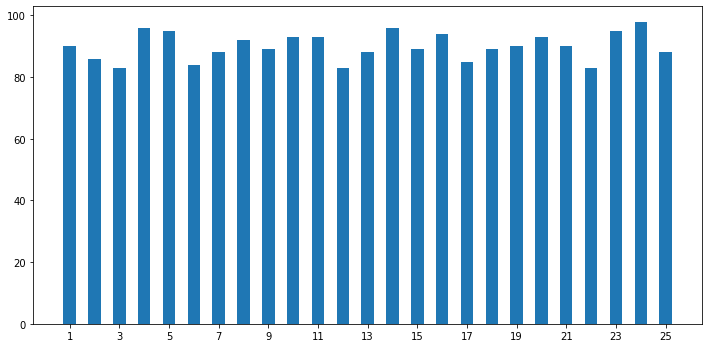

In [252]:
from matplotlib.pyplot import figure

from matplotlib import pyplot as plt


lista_bola = []
bola = []
for i in range(1,26):
    bola.append(i)
    coluna = 'bola_' + str(i) + "_sorteio"
    lista_bola.append(coluna)
    
xticks = []
for i in range(1,61,2):
    xticks.append(i)

x_bolas = bola
y_values = lotofacil[lista_bola].iloc[-1].values

figure(figsize=(10,5))
axes= plt.axes()

axes.set_xticks(xticks)
#axes.set_yticks([150, 175, 200,225, 250])
plt.tight_layout()
plt.bar(x_bolas, y_values, width=0.5)

In [253]:
%%time
def sorteios_sem_sair_bola(df: pd.DataFrame):
    """ conta o numero de jogos que as bolas ficaram sem ser sorteadas """
    for bola in range(1, 26):
        jogo = 0
        soma = 0
        lista_numeros = []
        for linha in range(len(df['jogos_ordenados'])):
            if bola in df['jogos_ordenados'].iloc[linha]:
                jogo = linha
            soma = df['Concurso'].iloc[linha] - df['Concurso'].iloc[jogo] 
            lista_numeros.append(soma)
        coluna_nova = "bola_" + str(bola) + "_jogos_sem_sorteio" 
        df[coluna_nova] = lista_numeros
        
sorteios_sem_sair_bola(lotofacil)

CPU times: user 2.14 s, sys: 10.1 ms, total: 2.15 s
Wall time: 2.15 s


In [254]:
%%time
def resultado_sorteios_sem_sair_bola(df: pd.DataFrame) -> list:
    """ adiciona a qtd de sorteios que cada bola ficou sem ser sorteada em uma lista """
    lista_jogos = [[0,0,0,0]]
    
    for linha, game in  zip(df.index, df['jogos_ordenados'].iloc[1:]): #range(1, len(df['jogos_ordenados'])):    
        lista_bolas = []
        for bola in range(1, 26):
            if bola in game:
                lista_bolas.append(df["bola_" + str(bola) + "_jogos_sem_sorteio"].iloc[linha-1]) 
        lista_jogos.append(lista_bolas)
    coluna_nova = 'sorteio_sem_sair_resultados'
    df[coluna_nova] = lista_jogos

resultado_sorteios_sem_sair_bola(lotofacil)

CPU times: user 427 ms, sys: 0 ns, total: 427 ms
Wall time: 428 ms


In [255]:
%%time
def soma_jogos_sem_sair(lista: list) -> int:
    """ retorna soma dos jogos """
    return sum(lista)

def media_jogos_sem_sair(lista: list) -> int:
    """ retorna media dos jogos """
    return round(np.mean(lista), 2)

def desvio_padrao_jogos_sem_sair(lista: list) -> int:
    """ retorna desvio padrao dos jogos """
    return round(np.std(lista), 2)

lotofacil['sorteio_sem_sair_resultados_sum'] = list(map(soma_jogos_sem_sair, 
                                                        lotofacil['sorteio_sem_sair_resultados']))
lotofacil['sorteio_sem_sair_resultados_mzean'] = list(map(media_jogos_sem_sair, 
                                                        lotofacil['sorteio_sem_sair_resultados']))
lotofacil['sorteio_sem_sair_resultados_std'] = list(map(desvio_padrao_jogos_sem_sair, 
                                                        lotofacil['sorteio_sem_sair_resultados']))

CPU times: user 164 ms, sys: 7.43 ms, total: 171 ms
Wall time: 163 ms


In [256]:
%%time
def numeros_primos(df: pd.DataFrame):
    """ faz uma coluna com a quantidade de numeros primos por jogo"""
    primos = [1,2,3,5,7,11,13,17,19,23]
    qtd_primos = []
    for jogo in df['jogos_ordenados']:
        contador = 0
        for bola in jogo:
            if bola in primos:
                contador += 1
        qtd_primos.append(contador)
    df['qtd_primos'] = qtd_primos

numeros_primos(lotofacil)

CPU times: user 5.59 ms, sys: 61 µs, total: 5.65 ms
Wall time: 5.43 ms


In [257]:
%%time
def numeros_fibonacci(df: pd.DataFrame):
    """ faz uma coluna com a quantidade de numeros de fibonacci por jogo"""
    fibonacci = [1, 2, 3, 5, 8, 13, 21]
    qtd_fibonacci = []
    for jogo in df['jogos_ordenados']:
        contador = 0
        for bola in jogo:
            if bola in fibonacci:
                contador += 1
        qtd_fibonacci.append(contador)
    df['qtd_fibonacci'] = qtd_fibonacci

numeros_fibonacci(lotofacil)

CPU times: user 9.36 ms, sys: 0 ns, total: 9.36 ms
Wall time: 9.3 ms


In [258]:
%%time
def numeros_fibonacci_e_primo(df: pd.DataFrame):
    """ faz uma coluna com a quantidade de numeros de fibonacci e primos por jogo"""
    fibonacci_primo = [1, 2, 3, 5,13]
    qtd_fibonacci_primo = []
    for jogo in df['jogos_ordenados']:
        contador = 0
        for bola in jogo:
            if bola in fibonacci_primo:
                contador += 1
        qtd_fibonacci_primo.append(contador)
    df['qtd_fibonacci_primo'] = qtd_fibonacci_primo

numeros_fibonacci_e_primo(lotofacil)

CPU times: user 4.79 ms, sys: 29 µs, total: 4.82 ms
Wall time: 4.66 ms


In [259]:
%%time
def pares_impares(df: pd.DataFrame):
    """ cria 2 colunas com as quantidades de numeros pares e impares por jogo"""
    pares = []
    impares = []
    for jogo in df['jogos_ordenados']:
        contador_par = 0
        contador_impar = 0
        for bola in jogo:
            if bola % 2 == 0:
                contador_par += 1
            else:
                contador_impar += 1
        pares.append(contador_par)
        impares.append(contador_impar)
    df['qtd_numeros_pares'] = pares
    df['qtd_numeros_impares'] = impares

    
pares_impares(lotofacil)

CPU times: user 9.03 ms, sys: 35 µs, total: 9.07 ms
Wall time: 8.55 ms


In [260]:
%%time
def divisivel_por_tres(df: pd.DataFrame):
    """ cria coluna com a quantidade de numeros divisiveis por 3"""
    divisivel_tres = []
    for jogo in df['jogos_ordenados']:
        contador = 0
        for bola in jogo:
            if bola % 3 == 0:
                contador += 1
        divisivel_tres.append(contador)
    df['qtd_divisivel_tres'] = divisivel_tres

divisivel_por_tres(lotofacil)

CPU times: user 3.17 ms, sys: 0 ns, total: 3.17 ms
Wall time: 3.1 ms


In [261]:
%%time
def diferenca_entre_bolas(df: pd.DataFrame) -> list:
    """ adiciona a diferenca entre bolas em uma lista """
    lista_jogos = []
    
    for game in df['jogos_ordenados']: #range(len(df['jogos_ordenados'])):    
        lista_diferenca = []
        for bola in range(1, 15):
            lista_diferenca.append(game[bola] - game[bola-1])

        lista_jogos.append(lista_diferenca)
    coluna_nova = 'diferenca_entre_bolas'
    #print(lista_jo)
    df[coluna_nova] = lista_jogos

diferenca_entre_bolas(lotofacil)

CPU times: user 17.4 ms, sys: 0 ns, total: 17.4 ms
Wall time: 17.3 ms


In [262]:
%%time
lotofacil['diferenca_entre_bolas_sum'] = list(map(soma_jogos_sem_sair, 
                                                        lotofacil['diferenca_entre_bolas']))
lotofacil['diferenca_entre_bolas_mean'] = list(map(media_jogos_sem_sair, 
                                                        lotofacil['diferenca_entre_bolas']))
lotofacil['diferenca_entre_bolas_std'] = list(map(desvio_padrao_jogos_sem_sair, 
                                                        lotofacil['diferenca_entre_bolas']))

CPU times: user 188 ms, sys: 12 ms, total: 200 ms
Wall time: 189 ms


In [263]:
%%time
def numeros_repetidos(df: pd.DataFrame):
    """ cria coluna com os numeros repetidos do jogo anterior"""
    lista_num_repetidos = [0]
    for jogo in df['sorteio_sem_sair_resultados'].iloc[1:]:
        contador = 0
        for bola in jogo:
            if bola == 0:
                contador += 1
        lista_num_repetidos.append(contador)
    df['numeros_repetidos'] = lista_num_repetidos

numeros_repetidos(lotofacil)



CPU times: user 8.51 ms, sys: 0 ns, total: 8.51 ms
Wall time: 8.19 ms


In [264]:
%%time

def resultado_jogo_mean(soma_jogos: int, desvio_padrao_jogos: int, entre_1_e_5: int,
                   entre_6_e_10: int, entre_11_e_15: int, entre_16_e_20: int,
                   entre_21_e_25: int, sorteio_sem_sair_resultados_sum: int,
                   sorteio_sem_sair_resultados_std: float, qtd_primos: int,
                   qtd_fibonacci: int, qtd_fibonacci_primo: int, qtd_numeros_pares: int,
                   qtd_divisivel_tres: int, diferenca_entre_bolas_sum:int, diferenca_entre_bolas_std: float,
                   numeros_repetidos: int) -> list:
    
    return ([soma_jogos, desvio_padrao_jogos, entre_1_e_5,
                   entre_6_e_10, entre_11_e_15, entre_16_e_20,
                   entre_21_e_25, sorteio_sem_sair_resultados_sum,
                   sorteio_sem_sair_resultados_std, qtd_primos,
                   qtd_fibonacci, qtd_fibonacci_primo, qtd_numeros_pares,
                   qtd_divisivel_tres, diferenca_entre_bolas_sum, diferenca_entre_bolas_std,
                   numeros_repetidos])

lotofacil['resultados_mean'] = list(map(resultado_jogo_mean, lotofacil['soma_jogos'], 
                                        lotofacil['desvio_padrao_jogos'],
                                       lotofacil['entre_1_e_5'],lotofacil['entre_6_e_10'],
                                        lotofacil['entre_11_e_15'],
                                       lotofacil['entre_16_e_20'],lotofacil['entre_21_e_25'],
                                        lotofacil['sorteio_sem_sair_resultados_sum'],
                                       lotofacil['sorteio_sem_sair_resultados_std'],lotofacil['qtd_primos'],
                                        lotofacil['qtd_fibonacci'],
                                       lotofacil['qtd_fibonacci_primo'],lotofacil['qtd_numeros_pares'],
                                        lotofacil['qtd_divisivel_tres'],
                                       lotofacil['diferenca_entre_bolas_sum'], 
                                        lotofacil['diferenca_entre_bolas_std'],
                                       lotofacil['numeros_repetidos']))

CPU times: user 12.2 ms, sys: 0 ns, total: 12.2 ms
Wall time: 11.9 ms


In [265]:
lotofacil['resultados_mean'].iloc[0]

[199, 7, 3, 3, 3, 3, 3, 0, 0.0, 6, 4, 4, 8, 5, 23, 0.72, 0]

In [266]:
%%time
def metrics_results(df: pd.DataFrame) -> list:
    media_soma_jogos = round(np.mean(list(lotofacil['soma_jogos'].iloc[-150:])))
    media_desvio_padrao_jogos = round(np.mean(list(lotofacil['desvio_padrao_jogos'].iloc[-150:])))
    media_entre_1_e_5 = round(np.mean(list(lotofacil['entre_1_e_5'].iloc[-150:])))
    media_entre_6_e_10 = round(np.mean(list(lotofacil['entre_6_e_10'].iloc[-150:])))
    media_entre_11_e_15 = round(np.mean(list(lotofacil['entre_11_e_15'].iloc[-150:])))
    media_entre_16_e_20 = round(np.mean(list(lotofacil['entre_16_e_20'].iloc[-150:])))
    media_entre_21_e_25 = round(np.mean(list(lotofacil['entre_21_e_25'].iloc[-150:])))
    media_sorteio_sem_sair_sum = round(np.mean(list(lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-150:])))
    media_sorteio_sem_sair_std = round(np.mean(list(lotofacil['sorteio_sem_sair_resultados_std'].iloc[-150:])))
    media_qtd_primos = round(np.mean(list(lotofacil['qtd_primos'].iloc[-150:])))
    media_qtd_fibonacci = round(np.mean(list(lotofacil['qtd_fibonacci'].iloc[-150:])))
    media_qtd_fibonacci_primo = round(np.mean(list(lotofacil['qtd_fibonacci_primo'].iloc[-150:])))
    media_qtd_numeros_pares = round(np.mean(list(lotofacil['qtd_numeros_pares'].iloc[-150:])))
    media_qtd_divisivel_tres = round(np.mean(list(lotofacil['qtd_divisivel_tres'].iloc[-150:])))
    media_diferenca_entre_bolas_sum = round(np.mean(list(lotofacil['diferenca_entre_bolas_sum'].iloc[-150:])))
    media_diferenca_entre_bolas_std = round(np.mean(list(lotofacil['diferenca_entre_bolas_std'].iloc[-150:])))
    media_numeros_repetidos = round(np.mean(list(lotofacil['numeros_repetidos'].iloc[-150:])))
    
    lista_linhas = []
    
    for result in df['resultados_mean']:
        lista_game = []
        if result[0] > media_soma_jogos:
            lista_game.append(2)
        elif result[0] == media_soma_jogos:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[1] > media_desvio_padrao_jogos:
            lista_game.append(2)
        elif result[1] == media_desvio_padrao_jogos:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[2] > media_entre_1_e_5:
            lista_game.append(2)
        elif result[2] == media_entre_1_e_5:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[3] > media_entre_6_e_10:
            lista_game.append(2)
        elif result[3] == media_entre_6_e_10:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[4] > media_entre_11_e_15:
            lista_game.append(2)
        elif result[4] == media_entre_11_e_15:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[5] > media_entre_16_e_20:
            lista_game.append(2)
        elif result[5] == media_entre_16_e_20:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[6] > media_entre_21_e_25:
            lista_game.append(2)
        elif result[6] == media_entre_21_e_25:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[7] > media_sorteio_sem_sair_sum:
            lista_game.append(2)
        elif result[7] == media_sorteio_sem_sair_sum:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[8] > media_sorteio_sem_sair_std:
            lista_game.append(2)
        elif result[8] == media_sorteio_sem_sair_std:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[9] > media_qtd_primos:
            lista_game.append(2)
        elif result[9] == media_qtd_primos:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[10] > media_qtd_fibonacci:
            lista_game.append(2)
        elif result[10] == media_qtd_fibonacci:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[11] > media_qtd_fibonacci_primo:
            lista_game.append(2)
        elif result[11] == media_qtd_fibonacci_primo:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[12] > media_qtd_numeros_pares:
            lista_game.append(2)
        elif result[12] == media_qtd_numeros_pares:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[13] > media_qtd_divisivel_tres:
            lista_game.append(2)
        elif result[13] == media_qtd_divisivel_tres:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        if result[14] > media_diferenca_entre_bolas_sum:
            lista_game.append(2)
        elif result[14] == media_diferenca_entre_bolas_sum:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
            
        if result[15] > media_diferenca_entre_bolas_std:
            lista_game.append(2)
        elif result[15] == media_diferenca_entre_bolas_std:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
            
        if result[16] > media_numeros_repetidos:
            lista_game.append(2)
        elif result[16] == media_numeros_repetidos:
            lista_game.append(1)
        else:
            lista_game.append(0)
            
        lista_linhas.append(lista_game)
        
    df['metrics'] = lista_linhas


metrics_results(lotofacil)

CPU times: user 20.2 ms, sys: 0 ns, total: 20.2 ms
Wall time: 20.2 ms


In [267]:
def sum_metrics(df: pd.DataFrame) -> int:
    """ retorna quanto atributos estao acima, igual ou abaixo da media, 2 = acima da media,
    1 = igual a media, 0 = abaixo da media.
    """
    
    lista_2 = []
    lista_1 = []
    lista_0 = []
    
    for metrics in df['metrics']:
        contador_2 = 0
        contador_1 = 0
        contador_0 = 0
        for number in metrics:
            if number == 2:
                contador_2 += 1
            elif number == 1:
                contador_1 += 1
            else:
                contador_0 += 1
        lista_2.append(contador_2)
        lista_1.append(contador_1)
        lista_0.append(contador_0)
        
    df['metric_up_media'] = lista_2
    df['metric_igual_media'] = lista_1
    df['metric_abaixo_media'] = lista_0
    
sum_metrics(lotofacil)

In [268]:
lotofacil[['metrics', 'metric_up_media', 'metric_igual_media', 'metric_abaixo_media']].iloc[-10:]

,metrics,metric_up_media,metric_igual_media,metric_abaixo_media
Concurso_2,,,,
1935,"[0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, ...",5,9,3
1936,"[0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, ...",6,3,8
1937,"[2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, ...",3,6,8
1938,"[2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, ...",4,3,10
1939,"[0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, ...",5,6,6
1940,"[2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, ...",7,4,6
1941,"[0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, ...",7,4,6
1942,"[0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, ...",7,4,6
1943,"[2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0, ...",5,5,7


In [269]:
lotofacil['metric_up_media'].iloc[-150:].value_counts()

5     41
7     22
6     22
4     18
8     15
3     14
9      7
2      6
11     2
10     2
1      1
Name: metric_up_media, dtype: int64

In [270]:
print(np.mean(lotofacil['metric_up_media'].iloc[-150:]))
print(np.std(lotofacil['metric_up_media'].iloc[-150:]))

5.62
1.9413740838213882


In [271]:
lotofacil[['sorteio_sem_sair_resultados', 'numeros_repetidos']]

,sorteio_sem_sair_resultados,numeros_repetidos
Concurso_2,,
1,"[0, 0, 0, 0]",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",15
3,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]",11
4,"[0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2]",9
5,"[0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0]",11
...,...,...
1940,"[4, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1]",7
1941,"[0, 1, 1, 0, 0, 0, 0, 0, 4, 2, 0, 1, 0, 0, 0]",10
1942,"[0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]",10


In [272]:
lotofacil[['jogos_ordenados', 'diferenca_entre_bolas', 'diferenca_entre_bolas_sum',
           'diferenca_entre_bolas_mean', 'diferenca_entre_bolas_std']]

,jogos_ordenados,diferenca_entre_bolas,diferenca_entre_bolas_sum,diferenca_entre_bolas_mean,diferenca_entre_bolas_std
Concurso_2,,,,,
1,"[2, 3, 5, 6, 9, 10, 11, 13, 14, 16, 18, 20, 23...","[1, 2, 1, 3, 1, 1, 2, 1, 2, 2, 2, 3, 1, 1]",23,1.64,0.72
2,"[1, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 19, 20,...","[3, 1, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1]",23,1.64,0.81
3,"[1, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 20,...","[3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 1]",23,1.64,0.81
4,"[1, 2, 4, 5, 8, 10, 12, 13, 16, 17, 18, 19, 23...","[1, 2, 1, 3, 2, 2, 1, 3, 1, 1, 1, 4, 1, 1]",24,1.71,0.96
5,"[1, 2, 4, 8, 9, 11, 12, 13, 15, 16, 19, 20, 23...","[1, 2, 4, 1, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1]",24,1.71,0.96
...,...,...,...,...,...
1940,"[1, 5, 8, 10, 11, 12, 13, 15, 17, 18, 21, 22, ...","[4, 3, 2, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1]",24,1.71,0.96
1941,"[1, 3, 4, 5, 8, 10, 12, 13, 14, 16, 17, 20, 22...","[2, 1, 1, 3, 2, 2, 1, 1, 2, 1, 3, 2, 2, 1]",24,1.71,0.70
1942,"[1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 15, 18, 20,...","[1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 3, 2, 4, 1]",24,1.71,0.96


In [273]:
#soma, media, desvio padrao, entre numeros, primos, fibonacci, primos e fibo, pares, impares, divisivel_3

In [274]:
%%time

def resultado_jogo(sorteio_sem_sair_resultados_sum: int, soma_jogos: int, media_jogos: int,
                   entre_1_5: int, entre_21_25: int, 
                   desvio_padrao_jogos: int, diferenca_entre_bolas_sum: int,
                   qtd_fibonacci_primo: int, qtd_primos: int, qtd_numeros_pares: int) -> list:
    
    return ([sorteio_sem_sair_resultados_sum, soma_jogos, media_jogos,
                   entre_1_5, entre_21_25, 
                   desvio_padrao_jogos, diferenca_entre_bolas_sum,
                   qtd_fibonacci_primo, qtd_primos, qtd_numeros_pares])

lotofacil['resultados_corr'] = list(map(resultado_jogo, lotofacil['sorteio_sem_sair_resultados_sum'], 
                                   lotofacil['soma_jogos'], lotofacil['media_jogos'],
                                   lotofacil['entre_1_e_5'], lotofacil['entre_21_e_25'],
                                   lotofacil['desvio_padrao_jogos'],
                                   lotofacil['diferenca_entre_bolas_sum'], lotofacil['qtd_fibonacci_primo'],
                                   lotofacil['qtd_primos'], lotofacil['qtd_numeros_pares']))

CPU times: user 5.25 ms, sys: 47 µs, total: 5.29 ms
Wall time: 5.26 ms


In [275]:
#soma, media, desvio padrao, entre numeros, primos, fibonacci, primos e fibo, pares, impares, divisivel_3
lotofacil['resultados_corr'].iloc[0]

[0, 199, 13, 3, 3, 7, 23, 4, 6, 8]

In [276]:
lotofacil.iloc[-5:]

,Concurso,Data,jogos_ordenados,jogos_desordenados,soma_jogos,media_jogos,desvio_padrao_jogos,entre_1_e_5,entre_6_e_10,entre_11_e_15,...,diferenca_entre_bolas_sum,diferenca_entre_bolas_mean,diferenca_entre_bolas_std,numeros_repetidos,resultados_mean,metrics,metric_up_media,metric_igual_media,metric_abaixo_media,resultados_corr
Concurso_2,,,,,,,,,,,,,,,,,,,,,
1940,1940,13/03/2020,"[1, 5, 8, 10, 11, 12, 13, 15, 17, 18, 21, 22, ...","[23, 13, 12, 1, 11, 15, 24, 21, 22, 5, 25, 10,...",225,15,7,2,2,4,...,24,1.71,0.96,7,"[225, 7, 2, 2, 4, 2, 5, 14, 1.12, 6, 5, 3, 6, ...","[2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, ...",7,4,6,"[14, 225, 15, 2, 5, 7, 24, 3, 6, 6]"
1941,1941,16/03/2020,"[1, 3, 4, 5, 8, 10, 12, 13, 14, 16, 17, 20, 22...","[8, 24, 12, 3, 16, 20, 5, 22, 17, 25, 1, 13, 4...",194,12,7,4,2,3,...,24,1.71,0.70,10,"[194, 7, 4, 2, 3, 3, 3, 9, 1.08, 5, 5, 4, 9, 3...","[0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, ...",7,4,6,"[9, 194, 12, 4, 3, 7, 24, 4, 5, 9]"
1942,1942,18/03/2020,"[1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 15, 18, 20,...","[1, 24, 18, 25, 15, 20, 3, 2, 10, 13, 12, 7, 1...",173,11,7,4,3,4,...,24,1.71,0.96,10,"[173, 7, 4, 3, 4, 2, 2, 7, 0.72, 6, 5, 4, 8, 5...","[0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, ...",7,4,6,"[7, 173, 11, 4, 2, 7, 24, 4, 6, 8]"
1943,1943,20/03/2020,"[2, 3, 6, 9, 10, 13, 14, 15, 16, 17, 18, 19, 2...","[22, 20, 10, 3, 9, 15, 13, 18, 14, 23, 17, 2, ...",207,13,6,2,3,3,...,21,1.50,0.82,7,"[207, 6, 2, 3, 3, 5, 2, 15, 1.15, 6, 3, 3, 8, ...","[2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0, ...",5,5,7,"[15, 207, 13, 2, 2, 6, 21, 3, 6, 8]"
1944,1944,23/03/2020,"[1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 16, 18, 22, ...","[2, 10, 24, 1, 9, 5, 13, 11, 18, 7, 4, 23, 22,...",173,11,7,4,4,2,...,23,1.64,0.89,8,"[173, 7, 4, 4, 2, 2, 3, 8, 0.62, 7, 5, 4, 8, 3...","[0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, ...",6,3,8,"[8, 173, 11, 4, 3, 7, 23, 4, 7, 8]"


In [277]:
%%time
# Criar todos os jogos possiveis
numeros_possiveis = []
for i in range (1,26):
    numeros_possiveis.append(i)

import itertools
jogos_possiveis = list(itertools.combinations(numeros_possiveis, 15))

jogos_possiveis = [list(i) for i in jogos_possiveis]

data_jogos_parts = dask.delayed(pd.DataFrame)()
data_jogos = dd.from_delayed(data_jogos_parts)
data_jogos = data_jogos.compute()
data_jogos['jogos_ordenados'] = jogos_possiveis

CPU times: user 10 s, sys: 282 ms, total: 10.3 s
Wall time: 10.3 s


In [278]:
%%time
# faz a soma dos jogos e deixa um inteiro
data_jogos['soma_jogos'] = list(map(soma_jogos, data_jogos['jogos_ordenados']))
# faz a média dos jogos e deixa um inteiro
data_jogos['media_jogos'] = list(map(media_jogos, data_jogos['jogos_ordenados']))
# faz o desvio padrão dos jogos
data_jogos['desvio_padrao_jogos'] = list(map(desvio_padrao_jogos, data_jogos['jogos_ordenados']))

entre_numeros(data_jogos, 1, 5, "entre_1_e_5")
entre_numeros(data_jogos, 6, 10, "entre_6_e_10")
entre_numeros(data_jogos, 11, 15, "entre_11_e_15")
entre_numeros(data_jogos, 16, 20, "entre_16_e_20")
entre_numeros(data_jogos, 21, 25, "entre_21_e_25")

numeros_primos(data_jogos)
numeros_fibonacci(data_jogos)

numeros_fibonacci_e_primo(data_jogos)
pares_impares(data_jogos)

divisivel_por_tres(data_jogos)



CPU times: user 4min 26s, sys: 11.1 s, total: 4min 37s
Wall time: 4min 24s


In [279]:
%%time
diferenca_entre_bolas(data_jogos)

data_jogos['diferenca_entre_bolas_sum'] = list(map(soma_jogos_sem_sair, 
                                                        data_jogos['diferenca_entre_bolas']))
data_jogos['diferenca_entre_bolas_mean'] = list(map(media_jogos_sem_sair, 
                                                        data_jogos['diferenca_entre_bolas']))
data_jogos['diferenca_entre_bolas_std'] = list(map(desvio_padrao_jogos_sem_sair, 
                                                        data_jogos['diferenca_entre_bolas']))



CPU times: user 4min 37s, sys: 11.3 s, total: 4min 49s
Wall time: 4min 34s


In [280]:
lotofacil[lotofacil['diferenca_entre_bolas_sum'] == 20]['sorteio_sem_sair_resultados_sum'].iloc[-20:].value_counts()

10    4
7     4
13    3
15    2
5     2
16    1
11    1
9     1
8     1
6     1
Name: sorteio_sem_sair_resultados_sum, dtype: int64

In [281]:
data_jogos['diferenca_entre_bolas_sum'].value_counts()

24    1144066
23     994840
22     610470
21     310080
20     135660
19      51408
18      16660
17       4480
16        945
15        140
14         11
Name: diferenca_entre_bolas_sum, dtype: int64

In [282]:
%%time
import dask.array as da

def resultado_sorteios_sem_sair_bola_2(df: pd.DataFrame, df_2: pd.DataFrame) -> list:
    """ adiciona a qtd de sorteios que cada bola ficou sem ser sorteada em uma lista """
    
    sorteios_sem_bola = list(df[["bola_1_jogos_sem_sorteio", "bola_2_jogos_sem_sorteio", "bola_3_jogos_sem_sorteio",
           "bola_4_jogos_sem_sorteio", "bola_5_jogos_sem_sorteio", "bola_6_jogos_sem_sorteio",
           "bola_7_jogos_sem_sorteio", "bola_8_jogos_sem_sorteio", "bola_9_jogos_sem_sorteio",
           "bola_10_jogos_sem_sorteio", "bola_11_jogos_sem_sorteio", "bola_12_jogos_sem_sorteio",
           "bola_13_jogos_sem_sorteio", "bola_14_jogos_sem_sorteio", "bola_15_jogos_sem_sorteio",
           "bola_16_jogos_sem_sorteio", "bola_17_jogos_sem_sorteio", "bola_18_jogos_sem_sorteio", 
           "bola_19_jogos_sem_sorteio", "bola_20_jogos_sem_sorteio", "bola_21_jogos_sem_sorteio",
           "bola_22_jogos_sem_sorteio", "bola_23_jogos_sem_sorteio", "bola_24_jogos_sem_sorteio",
           "bola_25_jogos_sem_sorteio" ]].iloc[-1])
    
    sorteios_sem_bola = dask.delayed(sorteios_sem_bola)
    sorteios_sem_bola = sorteios_sem_bola.compute()
    
    lista_jogos = []
    
    for game in df_2['jogos_ordenados']:    
        lista_bolas = []
        for bola in game:
            lista_bolas.append(sorteios_sem_bola[bola-1]) 
        lista_jogos.append(lista_bolas)
    coluna_nova = 'sorteio_sem_sair_resultados'
    df_2[coluna_nova] = lista_jogos

resultado_sorteios_sem_sair_bola_2(lotofacil, data_jogos)



CPU times: user 11.6 s, sys: 15.9 ms, total: 11.6 s
Wall time: 11.6 s


In [283]:
lotofacil[["bola_1_jogos_sem_sorteio", "bola_2_jogos_sem_sorteio", "bola_3_jogos_sem_sorteio",
           "bola_4_jogos_sem_sorteio", "bola_5_jogos_sem_sorteio", "bola_6_jogos_sem_sorteio",
           "bola_7_jogos_sem_sorteio", "bola_8_jogos_sem_sorteio", "bola_9_jogos_sem_sorteio",
           "bola_10_jogos_sem_sorteio", "bola_11_jogos_sem_sorteio", "bola_12_jogos_sem_sorteio",
           "bola_13_jogos_sem_sorteio", "bola_14_jogos_sem_sorteio", "bola_15_jogos_sem_sorteio",
           "bola_16_jogos_sem_sorteio", "bola_17_jogos_sem_sorteio", "bola_18_jogos_sem_sorteio", 
           "bola_19_jogos_sem_sorteio", "bola_20_jogos_sem_sorteio", "bola_21_jogos_sem_sorteio",
           "bola_22_jogos_sem_sorteio", "bola_23_jogos_sem_sorteio", "bola_24_jogos_sem_sorteio",
           "bola_25_jogos_sem_sorteio" ]].iloc[-1]

bola_1_jogos_sem_sorteio     0
bola_2_jogos_sem_sorteio     0
bola_3_jogos_sem_sorteio     1
bola_4_jogos_sem_sorteio     0
bola_5_jogos_sem_sorteio     0
bola_6_jogos_sem_sorteio     1
bola_7_jogos_sem_sorteio     0
bola_8_jogos_sem_sorteio     0
bola_9_jogos_sem_sorteio     0
bola_10_jogos_sem_sorteio    0
bola_11_jogos_sem_sorteio    0
bola_12_jogos_sem_sorteio    2
bola_13_jogos_sem_sorteio    0
bola_14_jogos_sem_sorteio    1
bola_15_jogos_sem_sorteio    1
bola_16_jogos_sem_sorteio    0
bola_17_jogos_sem_sorteio    1
bola_18_jogos_sem_sorteio    0
bola_19_jogos_sem_sorteio    1
bola_20_jogos_sem_sorteio    1
bola_21_jogos_sem_sorteio    4
bola_22_jogos_sem_sorteio    0
bola_23_jogos_sem_sorteio    0
bola_24_jogos_sem_sorteio    0
bola_25_jogos_sem_sorteio    2
Name: 1944, dtype: int64

In [284]:
#data_jogos[['sorteio_sem_sair_resultados', 'jogos_ordenados']]

In [285]:
%%time
data_jogos['sorteio_sem_sair_resultados_sum'] = list(map(soma_jogos_sem_sair, 
                                                        data_jogos['sorteio_sem_sair_resultados']))
data_jogos['sorteio_sem_sair_resultados_mean'] = list(map(media_jogos_sem_sair, 
                                                        data_jogos['sorteio_sem_sair_resultados']))
data_jogos['sorteio_sem_sair_resultados_std'] = list(map(desvio_padrao_jogos_sem_sair, 
                                                        data_jogos['sorteio_sem_sair_resultados']))


CPU times: user 4min 39s, sys: 11.5 s, total: 4min 51s
Wall time: 4min 36s


In [286]:
%%time
data_jogos['resultados_corr'] = list(map(resultado_jogo, data_jogos['sorteio_sem_sair_resultados_sum'], 
                                   data_jogos['soma_jogos'], data_jogos['media_jogos'],
                                   data_jogos['entre_1_e_5'], data_jogos['entre_21_e_25'],
                                   data_jogos['desvio_padrao_jogos'],
                                   data_jogos['diferenca_entre_bolas_sum'], data_jogos['qtd_fibonacci_primo'],
                                   data_jogos['qtd_primos'], data_jogos['qtd_numeros_pares']))

CPU times: user 7.69 s, sys: 18 ms, total: 7.7 s
Wall time: 7.68 s


In [287]:
%%time
numeros_repetidos(data_jogos)

CPU times: user 3.61 s, sys: 38 ms, total: 3.65 s
Wall time: 3.65 s


In [288]:
#data_jogos['numeros_repetidos']

Text(0, 0.5, 'sorteio_sem_sair_resultados_sum')

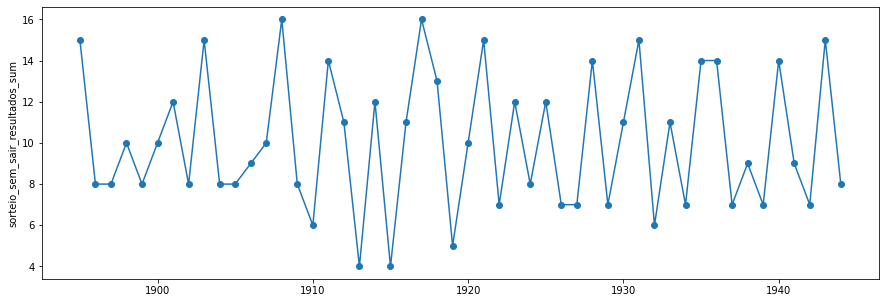

In [289]:
# grafico de dias sem sorteio por jogos ultimos 100 jogos
from matplotlib.pyplot import figure

from matplotlib import pyplot as plt
tamanho = 50

x_media = lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-tamanho:].index
y_media = list(lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label='sorteio_sem_sair_resultados_sum', marker='o')
plt.ylabel("sorteio_sem_sair_resultados_sum")

Text(0, 0.5, 'desvio_padrao_jogos')

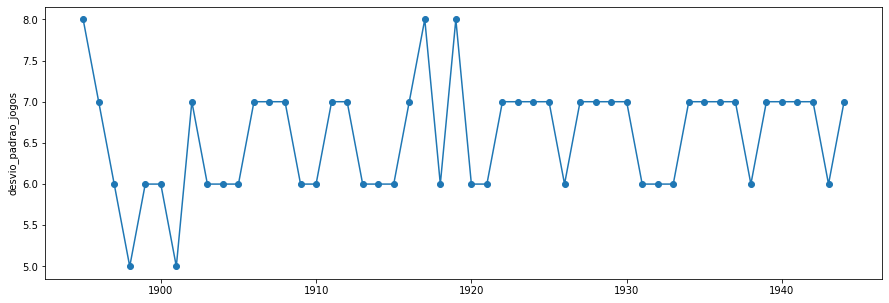

In [290]:
tamanho = 50

x_media = lotofacil['desvio_padrao_jogos'].iloc[-tamanho:].index
y_media = list(lotofacil['desvio_padrao_jogos'].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label='desvio_padrao_jogos', marker='o')
plt.ylabel("desvio_padrao_jogos")

Text(0, 0.5, 'qtd_fibonacci_primo')

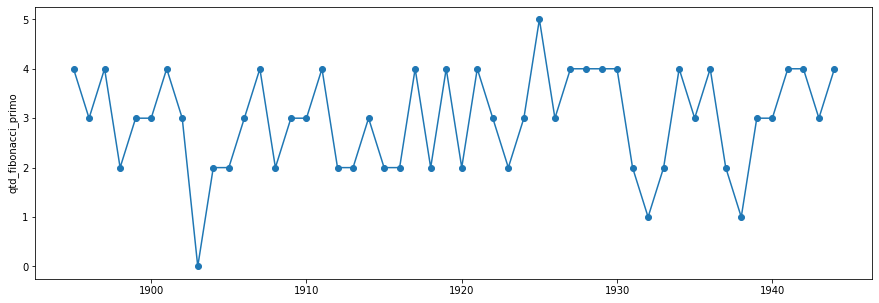

In [291]:
tamanho = 50

x_media = lotofacil['qtd_fibonacci_primo'].iloc[-tamanho:].index
y_media = list(lotofacil['qtd_fibonacci_primo'].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label='qtd_fibonacci_primo', marker='o')
plt.ylabel("qtd_fibonacci_primo")

In [292]:
data_jogos[['sorteio_sem_sair_resultados_sum', 'soma_jogos','media_jogos','desvio_padrao_jogos','entre_1_e_5', 'entre_6_e_10',
           'entre_11_e_15', 'entre_16_e_20', 'entre_21_e_25', 
           'qtd_primos', 'qtd_fibonacci', 'qtd_fibonacci_primo', 'qtd_numeros_pares', 
           'qtd_numeros_impares', 'qtd_divisivel_tres',
           'diferenca_entre_bolas_sum', 'diferenca_entre_bolas_mean',
           'diferenca_entre_bolas_std']].corr().style.background_gradient(cmap='coolwarm')

,sorteio_sem_sair_resultados_sum,soma_jogos,media_jogos,desvio_padrao_jogos,entre_1_e_5,entre_6_e_10,entre_11_e_15,entre_16_e_20,entre_21_e_25,qtd_primos,qtd_fibonacci,qtd_fibonacci_primo,qtd_numeros_pares,qtd_numeros_impares,qtd_divisivel_tres,diferenca_entre_bolas_sum,diferenca_entre_bolas_mean,diferenca_entre_bolas_std
sorteio_sem_sair_resultados_sum,1.000000,0.337048,0.327769,0.016728,-0.213201,-0.213201,0.106600,0.000000,0.319801,-0.261116,0.075974,-0.213201,-0.187767,0.187767,0.383918,0.040806,0.040789,-0.008835
soma_jogos,0.337048,1.000000,0.972463,-0.000000,-0.693375,-0.346688,0.000000,0.346688,0.693375,-0.328360,-0.469458,-0.568568,-0.000000,0.000000,0.047565,0.000000,0.000000,-0.000000
media_jogos,0.327769,0.972463,1.000000,0.000135,-0.674282,-0.337142,0.000001,0.337141,0.674281,-0.319317,-0.456528,-0.552909,-0.000001,0.000001,0.046261,-0.000005,-0.000005,0.000003
desvio_padrao_jogos,0.016728,-0.000000,0.000135,1.000000,0.465326,-0.233065,-0.464522,-0.233065,0.465326,0.153868,0.255389,0.314918,-0.078226,0.078226,-0.057616,0.636222,0.636190,0.317045
entre_1_e_5,-0.213201,-0.693375,-0.674282,0.465326,1.000000,-0.250000,-0.250000,-0.250000,-0.250000,0.408248,0.579066,0.750000,-0.080064,0.080064,-0.128624,0.288795,0.288802,0.192354
entre_6_e_10,-0.213201,-0.346688,-0.337142,-0.233065,-0.250000,1.000000,-0.250000,-0.250000,-0.250000,-0.204124,-0.089087,-0.250000,0.120096,-0.120096,0.085749,-0.192148,-0.192134,-0.127392
entre_11_e_15,0.106600,0.000000,0.000001,-0.464522,-0.250000,-0.250000,1.000000,-0.250000,-0.250000,0.000000,-0.089087,0.000000,-0.080064,0.080064,0.085749,-0.193294,-0.193336,-0.129924
entre_16_e_20,0.000000,0.346688,0.337141,-0.233065,-0.250000,-0.250000,-0.250000,1.000000,-0.250000,0.000000,-0.311805,-0.250000,0.120096,-0.120096,-0.128624,-0.192148,-0.192134,-0.127392
entre_21_e_25,0.319801,0.693375,0.674281,0.465326,-0.250000,-0.250000,-0.250000,-0.250000,1.000000,-0.204124,-0.089087,-0.250000,-0.080064,0.080064,0.085749,0.288795,0.288802,0.192354
qtd_primos,-0.261116,-0.328360,-0.319317,0.153868,0.408248,-0.204124,0.000000,0.000000,-0.204124,1.000000,0.400066,0.612372,-0.621034,0.621034,-0.385077,0.100752,0.100750,0.076300


In [293]:
#soma_jogos 0.97 media_jogos
#soma_jogos -0.69 entre_1_e_5
#soma_jogos 0.69 entre_21_e_25

#desvio_padrao_jogos 0.63 diferenca_entre_bolas_sum

#entre_1_e_5 0.75 qtd_fibonacci_primo

#qtd_primos 0.61 qtd_fibonacci_primo
#qtd_primos -0.62 qtd_numeros_pares
#qtd_primos 0.62 qtd_numeros_impares

#qtd_fibonacci_primo 0.80 qtd_fibonacci


In [294]:
coluna = 'diferenca_entre_bolas_sum'
print(np.mean(list(lotofacil[(lotofacil['desvio_padrao_jogos'] >= 6) & (lotofacil['desvio_padrao_jogos'] <= 7) ][coluna].iloc[-150:])))
print(np.std(list(lotofacil[(lotofacil['desvio_padrao_jogos'] >= 6) & (lotofacil['desvio_padrao_jogos'] <= 7) ][coluna].iloc[-150:])))#.value_counts()

22.906666666666666
1.0791766408805477


In [295]:
data_jogos['diferenca_entre_bolas_sum'].value_counts()

24    1144066
23     994840
22     610470
21     310080
20     135660
19      51408
18      16660
17       4480
16        945
15        140
14         11
Name: diferenca_entre_bolas_sum, dtype: int64

In [296]:
media_sorteio_sem_sair = round(np.mean(list(lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-150:])))
std_sorteio_sem_sair = round(np.std(list(lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-150:])))

media_soma_jogos = round(np.mean(list(lotofacil['soma_jogos'].iloc[-150:])))
std_soma_jogos = round(np.std(list(lotofacil['soma_jogos'].iloc[-150:])))

media_entre_1_e_5 = round(np.mean(list(lotofacil['entre_1_e_5'].iloc[-150:])))
std_entre_1_e_5 = round(np.std(list(lotofacil['entre_1_e_5'].iloc[-150:])))

media_entre_21_e_25 = round(np.mean(list(lotofacil['entre_21_e_25'].iloc[-150:])))
std_entre_21_e_25 = round(np.std(list(lotofacil['entre_21_e_25'].iloc[-150:])))

media_qtd_primos = round(np.mean(list(lotofacil['qtd_primos'].iloc[-150:])))
std_qtd_primos = round(np.std(list(lotofacil['qtd_primos'].iloc[-150:])))

media_qtd_fibonacci_primo = round(np.mean(list(lotofacil['qtd_fibonacci_primo'].iloc[-150:])))
std_qtd_fibonacci_primo = round(np.std(list(lotofacil['qtd_fibonacci_primo'].iloc[-150:])))

media_qtd_numeros_pares = round(np.mean(list(lotofacil['qtd_numeros_pares'].iloc[-150:])))
std_qtd_numeros_pares = round(np.std(list(lotofacil['qtd_numeros_pares'].iloc[-150:])))

media_desvio_padrao_jogos = round(np.mean(list(lotofacil['desvio_padrao_jogos'].iloc[-150:])))
std_desvio_padrao_jogos = round(np.std(list(lotofacil['desvio_padrao_jogos'].iloc[-150:])))

media_diferenca_entre_bolas_sum = round(np.mean(list(lotofacil['diferenca_entre_bolas_sum'].iloc[-150:])))
std_diferenca_entre_bolas_sum = round(np.std(list(lotofacil['diferenca_entre_bolas_sum'].iloc[-150:])))

In [297]:
print(lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-1])
print(lotofacil['desvio_padrao_jogos'].iloc[-1])

8
7


In [298]:
resultado_teste = [1, 2, 4, 6, 7, 9, 10,11,12,16,17,19,23,24,25]

In [299]:
%%time

def get_games(df: pd.DataFrame) -> list:
    
    index = df.index
    sorteio_sair_sum = []
    soma = []
    media = []
    um_e_5 = []
    vinte_um_e_vinte_5 = []
    std = []
    diferenca_bolas = []
    fibo_primo = []
    primos = []
    pares = []
    
    resultados = list(df['resultados_corr'])
    
    # Se a tendencia do sorteio_sem_sair_resultados_sum for ser maior que a media, coloque True
    # Se não coloque false
    decisao_sort_sem_sair = lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-1]
    
    if decisao_sort_sem_sair >= media_sorteio_sem_sair:
        maior_soma = True
    else:
        maior_soma = False
    # Se a tendencia do desvio_padrao_jogos for ser maior que a media, coloque True
    # Se não coloque false
    decisao_std = lotofacil['desvio_padrao_jogos'].iloc[-1]
    if decisao_std >= media_desvio_padrao_jogos:
        maior_std = True  # (7)
    else:
        maior_std = False
        
    if maior_soma:
        for sorteios in index:
            if ((resultados[sorteios][0] >= media_sorteio_sem_sair - std_sorteio_sem_sair)
                and (resultados[sorteios][0] <= media_sorteio_sem_sair + std_sorteio_sem_sair)):
                sorteio_sair_sum.append(sorteios)
                
        for sorteios in sorteio_sair_sum:
            if ((resultados[sorteios][1] >= media_soma_jogos) and
                (resultados[sorteios][1] <= media_soma_jogos + std_soma_jogos)):
                soma.append(sorteios)
        for sorteios in soma:
            if ((resultados[sorteios][3] >= media_entre_1_e_5) and
                (resultados[sorteios][3] <= media_entre_1_e_5 + std_entre_1_e_5)):
                um_e_5.append(sorteios)
        for sorteios in um_e_5:
            if ((resultados[sorteios][4] >= media_entre_21_e_25) and
                (resultados[sorteios][4] <= media_entre_21_e_25 + std_entre_21_e_25)):
                vinte_um_e_vinte_5.append(sorteios)
        for sorteios in vinte_um_e_vinte_5:
            if ((resultados[sorteios][8] >= media_qtd_primos) and 
                (resultados[sorteios][8] <= media_qtd_primos + std_qtd_primos)):
                primos.append(sorteios)
        for sorteios in primos:
            if ((resultados[sorteios][7] >= media_qtd_fibonacci_primo) and 
                (resultados[sorteios][7] <= media_qtd_fibonacci_primo + std_qtd_fibonacci_primo)):
                fibo_primo.append(sorteios)
        for sorteios in fibo_primo:
            if ((resultados[sorteios][9] >= media_qtd_numeros_pares) and
                (resultados[sorteios][9] <= media_qtd_numeros_pares + std_qtd_numeros_pares)):
                pares.append(sorteios)
# MENOR    
    else:
        for sorteios in index:
            if ((resultados[sorteios][0] >= media_sorteio_sem_sair - std_sorteio_sem_sair) and
                (resultados[sorteios][0] <= media_sorteio_sem_sair + std_sorteio_sem_sair)):
                sorteio_sair_sum.append(sorteios)

        for sorteios in sorteio_sair_sum:
            if ((resultados[sorteios][1] >= media_soma_jogos - std_soma_jogos) and
                (resultados[sorteios][1] <= media_soma_jogos)):
                soma.append(sorteios)
        for sorteios in soma:
            if ((resultados[sorteios][3] >= media_entre_1_e_5 - std_entre_1_e_5) and
                (resultados[sorteios][3] <= media_entre_1_e_5)):
                um_e_5.append(sorteios)
        for sorteios in um_e_5:
            if ((resultados[sorteios][4] >= media_entre_21_e_25 - std_entre_21_e_25) and
                (resultados[sorteios][4] <= media_entre_21_e_25)):
                vinte_um_e_vinte_5.append(sorteios)
        for sorteios in vinte_um_e_vinte_5:
            if ((resultados[sorteios][8] >= media_qtd_primos - std_qtd_primos) and 
                (resultados[sorteios][8] <= media_qtd_primos)):
                primos.append(sorteios)
        for sorteios in primos:
            if ((resultados[sorteios][7] >= media_qtd_fibonacci_primo - std_qtd_fibonacci_primo) and 
                (resultados[sorteios][7] <= media_qtd_fibonacci_primo)):
                fibo_primo.append(sorteios)
        for sorteios in fibo_primo:
            if ((resultados[sorteios][9] >= media_qtd_numeros_pares - std_qtd_numeros_pares) and 
                (resultados[sorteios][9] <= media_qtd_numeros_pares)):
                pares.append(sorteios)
                
    if maior_std:        
        for sorteios in pares:
            if ((resultados[sorteios][5] >= media_desvio_padrao_jogos) and
                (resultados[sorteios][5] <= media_desvio_padrao_jogos + std_desvio_padrao_jogos)):
                std.append(sorteios)
        for sorteios in std:
            if ((resultados[sorteios][6] >= media_diferenca_entre_bolas_sum) and
                (resultados[sorteios][6] <= media_diferenca_entre_bolas_sum + std_diferenca_entre_bolas_sum)):
                diferenca_bolas.append(sorteios)
    else:        
        for sorteios in pares:
            if ((resultados[sorteios][5] >= media_desvio_padrao_jogos - std_desvio_padrao_jogos) and
                (resultados[sorteios][5] <= media_desvio_padrao_jogos)):
                std.append(sorteios)
        for sorteios in std:
            if ((resultados[sorteios][6] >= media_diferenca_entre_bolas_sum - std_diferenca_entre_bolas_sum) and
                (resultados[sorteios][6] <= media_diferenca_entre_bolas_sum)):
                diferenca_bolas.append(sorteios)
    
    return primos
    # vinte_um_e_vinte_5
    # um_e_5
lista_final = get_games(data_jogos)

CPU times: user 2.15 s, sys: 0 ns, total: 2.15 s
Wall time: 2.15 s


In [300]:
len(lista_final)

280522

In [301]:
resultado_teste in list(data_jogos.iloc[lista_final]['jogos_ordenados'])

False

In [302]:
for i, result in zip(data_jogos.index, data_jogos['jogos_ordenados']):
    if resultado_teste == result:
        ver_resultado = i
        print(i)

840476


In [303]:
data_jogos.iloc[ver_resultado]

jogos_ordenados                     [1, 2, 4, 6, 7, 9, 10, 11, 12, 16, 17, 19, 23,...
soma_jogos                                                                        186
media_jogos                                                                        12
desvio_padrao_jogos                                                                 7
entre_1_e_5                                                                         3
entre_6_e_10                                                                        4
entre_11_e_15                                                                       2
entre_16_e_20                                                                       3
entre_21_e_25                                                                       3
qtd_primos                                                                          7
qtd_fibonacci                                                                       2
qtd_fibonacci_primo                                   

In [304]:
%%time

def resultado_jogo_mean(soma_jogos: int, desvio_padrao_jogos: int, entre_1_e_5: int,
                   entre_6_e_10: int, entre_11_e_15: int, entre_16_e_20: int,
                   entre_21_e_25: int, sorteio_sem_sair_resultados_sum: int,
                   sorteio_sem_sair_resultados_std: float, qtd_primos: int,
                   qtd_fibonacci: int, qtd_fibonacci_primo: int, qtd_numeros_pares: int,
                   qtd_divisivel_tres: int, diferenca_entre_bolas_sum:int, diferenca_entre_bolas_std: float,
                   numeros_repetidos: int) -> list:
    
    return ([soma_jogos, desvio_padrao_jogos, entre_1_e_5,
                   entre_6_e_10, entre_11_e_15, entre_16_e_20,
                   entre_21_e_25, sorteio_sem_sair_resultados_sum,
                   sorteio_sem_sair_resultados_std, qtd_primos,
                   qtd_fibonacci, qtd_fibonacci_primo, qtd_numeros_pares,
                   qtd_divisivel_tres, diferenca_entre_bolas_sum, diferenca_entre_bolas_std,
                   numeros_repetidos])

data_jogos['resultados_mean'] = list(map(resultado_jogo_mean, data_jogos['soma_jogos'], 
                                   data_jogos['desvio_padrao_jogos'], data_jogos['entre_1_e_5'],
                                   data_jogos['entre_6_e_10'], data_jogos['entre_11_e_15'],
                                   data_jogos['entre_16_e_20'], data_jogos['entre_21_e_25'],
                                   data_jogos['sorteio_sem_sair_resultados_sum'],
                                   data_jogos['sorteio_sem_sair_resultados_std'], data_jogos['qtd_primos'], 
                                   data_jogos['qtd_fibonacci'], data_jogos['qtd_fibonacci_primo'],
                                   data_jogos['qtd_numeros_pares'], data_jogos['qtd_divisivel_tres'],
                                   data_jogos['diferenca_entre_bolas_sum'], 
                                   data_jogos['diferenca_entre_bolas_std'], data_jogos['numeros_repetidos']))

CPU times: user 9.98 s, sys: 2.55 ms, total: 9.98 s
Wall time: 9.95 s


In [305]:
%%time
# Metrica Data Jogos

metrics_results(data_jogos)

CPU times: user 10.8 s, sys: 0 ns, total: 10.8 s
Wall time: 10.8 s


In [306]:
%%time
def sum_metrics(df: pd.DataFrame) -> int:
    """ retorna quanto atributos estao acima, igual ou abaixo da media, 2 = acima da media,
    1 = igual a media, 0 = abaixo da media.
    """
    
    lista_2 = []
    lista_1 = []
    lista_0 = []
    
    for metrics in df['metrics']:
        contador_2 = 0
        contador_1 = 0
        contador_0 = 0
        for number in metrics:
            if number == 2:
                contador_2 += 1
            elif number == 1:
                contador_1 += 1
            else:
                contador_0 += 1
        lista_2.append(contador_2)
        lista_1.append(contador_1)
        lista_0.append(contador_0)
        
    df['metric_up_media'] = lista_2
    df['metric_igual_media'] = lista_1
    df['metric_abaixo_media'] = lista_0
    
sum_metrics(data_jogos)

CPU times: user 7.34 s, sys: 0 ns, total: 7.34 s
Wall time: 7.33 s


In [307]:
#Aqui Aqui
data_jogos[(data_jogos['metric_up_media'] == 2)]

,jogos_ordenados,soma_jogos,media_jogos,desvio_padrao_jogos,entre_1_e_5,entre_6_e_10,entre_11_e_15,entre_16_e_20,entre_21_e_25,qtd_primos,...,sorteio_sem_sair_resultados_sum,sorteio_sem_sair_resultados_mean,sorteio_sem_sair_resultados_std,resultados_corr,numeros_repetidos,resultados_mean,metrics,metric_up_media,metric_igual_media,metric_abaixo_media
203674,"[1, 2, 3, 4, 6, 7, 8, 11, 12, 14, 16, 17, 20, ...",167,11,7,4,3,3,3,2,6,...,7,0.47,0.62,"[7, 167, 11, 4, 2, 7, 23, 3, 6, 10]",9,"[167, 7, 4, 3, 3, 3, 2, 7, 0.62, 6, 4, 3, 10, ...","[0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, ...",2,9,6
203729,"[1, 2, 3, 4, 6, 7, 8, 11, 12, 14, 16, 19, 20, ...",169,11,7,4,3,3,3,2,6,...,7,0.47,0.62,"[7, 169, 11, 4, 2, 7, 23, 3, 6, 10]",9,"[169, 7, 4, 3, 3, 3, 2, 7, 0.62, 6, 4, 3, 10, ...","[0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, ...",2,9,6
203779,"[1, 2, 3, 4, 6, 7, 8, 11, 12, 14, 17, 18, 20, ...",169,11,7,4,3,3,3,2,6,...,7,0.47,0.62,"[7, 169, 11, 4, 2, 7, 23, 3, 6, 10]",9,"[169, 7, 4, 3, 3, 3, 2, 7, 0.62, 6, 4, 3, 10, ...","[0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, ...",2,10,5
203834,"[1, 2, 3, 4, 6, 7, 8, 11, 12, 14, 18, 19, 20, ...",171,11,7,4,3,3,3,2,6,...,7,0.47,0.62,"[7, 171, 11, 4, 2, 7, 23, 3, 6, 10]",9,"[171, 7, 4, 3, 3, 3, 2, 7, 0.62, 6, 4, 3, 10, ...","[0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, ...",2,10,5
203915,"[1, 2, 3, 4, 6, 7, 8, 11, 12, 15, 16, 17, 19, ...",166,11,7,4,3,3,3,2,8,...,7,0.47,0.62,"[7, 166, 11, 4, 2, 7, 22, 3, 8, 7]",9,"[166, 7, 4, 3, 3, 3, 2, 7, 0.62, 8, 4, 3, 7, 4...","[0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, ...",2,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251140,"[5, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, ...",234,15,5,1,3,3,5,3,5,...,7,0.47,0.62,"[7, 234, 15, 1, 3, 5, 20, 1, 5, 7]",9,"[234, 5, 1, 3, 3, 5, 3, 7, 0.62, 5, 2, 1, 7, 4...","[2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,5,10
3251369,"[5, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, ...",232,15,5,1,3,3,5,3,5,...,8,0.53,0.72,"[8, 232, 15, 1, 3, 5, 20, 2, 5, 7]",9,"[232, 5, 1, 3, 3, 5, 3, 8, 0.72, 5, 3, 2, 7, 4...","[2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,5,10
3251371,"[5, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, ...",234,15,5,1,3,3,5,3,5,...,8,0.53,0.72,"[8, 234, 15, 1, 3, 5, 20, 2, 5, 7]",9,"[234, 5, 1, 3, 3, 5, 3, 8, 0.72, 5, 3, 2, 7, 5...","[2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...",2,6,9
3251490,"[5, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, ...",234,15,5,1,3,3,5,3,5,...,7,0.47,0.62,"[7, 234, 15, 1, 3, 5, 20, 2, 5, 7]",9,"[234, 5, 1, 3, 3, 5, 3, 7, 0.62, 5, 3, 2, 7, 3...","[2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,5,10


In [308]:
lotofacil[lotofacil['metric_up_media'] == 2]#.iloc[-150:].value_counts()

,Concurso,Data,jogos_ordenados,jogos_desordenados,soma_jogos,media_jogos,desvio_padrao_jogos,entre_1_e_5,entre_6_e_10,entre_11_e_15,...,diferenca_entre_bolas_sum,diferenca_entre_bolas_mean,diferenca_entre_bolas_std,numeros_repetidos,resultados_mean,metrics,metric_up_media,metric_igual_media,metric_abaixo_media,resultados_corr
Concurso_2,,,,,,,,,,,,,,,,,,,,,
32,32,03/05/2004,"[1, 2, 4, 6, 7, 9, 10, 11, 14, 15, 16, 17, 20,...","[10, 14, 9, 16, 15, 7, 22, 6, 4, 2, 1, 17, 23,...",177,11,6,3,4,3,...,22,1.57,0.73,9,"[177, 6, 3, 4, 3, 3, 2, 9, 0.88, 6, 2, 2, 8, 3...","[0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, ...",2,5,10,"[9, 177, 11, 3, 2, 6, 22, 2, 6, 8]"
82,82,18/04/2005,"[1, 4, 5, 6, 8, 9, 12, 13, 15, 17, 18, 19, 20,...","[4, 8, 19, 12, 23, 17, 13, 20, 1, 18, 6, 15, 5...",192,12,6,3,3,3,...,22,1.57,0.73,8,"[192, 6, 3, 3, 3, 4, 2, 11, 0.93, 6, 4, 3, 7, ...","[0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, ...",2,8,7,"[11, 192, 12, 3, 2, 6, 22, 3, 6, 7]"
86,86,16/05/2005,"[2, 4, 5, 6, 8, 9, 12, 13, 14, 17, 18, 19, 23,...","[13, 19, 12, 18, 5, 6, 9, 24, 23, 4, 17, 8, 25...",199,13,7,3,3,3,...,23,1.64,0.97,8,"[199, 7, 3, 3, 3, 3, 3, 7, 0.5, 6, 4, 3, 8, 5,...","[2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, ...",2,11,4,"[7, 199, 13, 3, 3, 7, 23, 3, 6, 8]"
151,151,14/08/2006,"[3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 18, 20...","[18, 10, 13, 11, 3, 9, 12, 4, 23, 7, 24, 16, 1...",189,12,6,3,3,4,...,21,1.50,0.63,8,"[189, 6, 3, 3, 4, 3, 2, 9, 0.71, 6, 3, 3, 8, 5...","[0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, ...",2,6,9,"[9, 189, 12, 3, 2, 6, 21, 3, 6, 8]"
156,156,18/09/2006,"[1, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20...","[3, 8, 9, 15, 13, 10, 12, 4, 23, 20, 22, 1, 19...",184,12,6,3,3,5,...,22,1.57,1.05,9,"[184, 6, 3, 3, 5, 2, 2, 7, 0.62, 6, 4, 3, 7, 4...","[0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",2,7,8,"[7, 184, 12, 3, 2, 6, 22, 3, 6, 7]"
263,263,15/10/2007,"[1, 4, 7, 8, 9, 10, 11, 14, 15, 16, 18, 19, 21...","[23, 19, 8, 15, 16, 11, 7, 21, 24, 9, 10, 1, 1...",200,13,6,2,4,3,...,23,1.64,0.81,9,"[200, 6, 2, 4, 3, 3, 3, 9, 0.88, 5, 3, 1, 7, 5...","[2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",2,7,8,"[9, 200, 13, 2, 3, 6, 23, 1, 5, 7]"
266,266,25/10/2007,"[1, 3, 4, 5, 6, 7, 9, 11, 14, 15, 18, 19, 21, ...","[18, 21, 3, 19, 4, 14, 24, 22, 5, 6, 7, 9, 11,...",179,11,7,4,3,3,...,23,1.64,0.72,9,"[179, 7, 4, 3, 3, 2, 3, 7, 0.62, 6, 4, 3, 6, 7...","[0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, ...",2,9,6,"[7, 179, 11, 4, 3, 7, 23, 3, 6, 6]"
274,274,22/11/2007,"[2, 4, 5, 6, 7, 10, 11, 12, 14, 15, 17, 20, 21...","[15, 25, 5, 23, 10, 2, 7, 12, 17, 14, 11, 21, ...",192,12,7,3,3,4,...,23,1.64,0.72,10,"[192, 7, 3, 3, 4, 2, 3, 7, 0.81, 6, 3, 2, 7, 4...","[0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, ...",2,7,8,"[7, 192, 12, 3, 3, 7, 23, 2, 6, 7]"
300,300,25/02/2008,"[3, 4, 7, 8, 9, 11, 12, 15, 17, 19, 20, 21, 22...","[7, 21, 9, 4, 11, 23, 19, 17, 3, 12, 8, 25, 20...",216,14,6,2,3,3,...,22,1.57,0.73,9,"[216, 6, 2, 3, 3, 3, 4, 8, 0.72, 6, 3, 1, 5, 5...","[2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, ...",2,6,9,"[8, 216, 14, 2, 4, 6, 22, 1, 6, 5]"


In [309]:
lotofacil['metric_igual_media'].iloc[-150:].value_counts()

5     28
4     26
3     25
6     24
7     15
2      9
8      8
9      4
1      4
10     3
0      2
12     1
11     1
Name: metric_igual_media, dtype: int64

In [310]:
lotofacil['metric_abaixo_media'].iloc[-150:].value_counts()

7     35
6     29
8     24
5     20
9     13
4     13
3      9
10     3
2      2
12     1
11     1
Name: metric_abaixo_media, dtype: int64

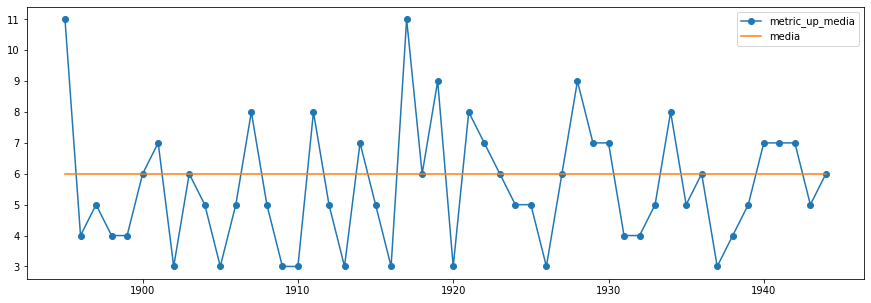

In [311]:
from matplotlib.pyplot import figure

from matplotlib import pyplot as plt
tamanho = 50

coluna = 'metric_up_media'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

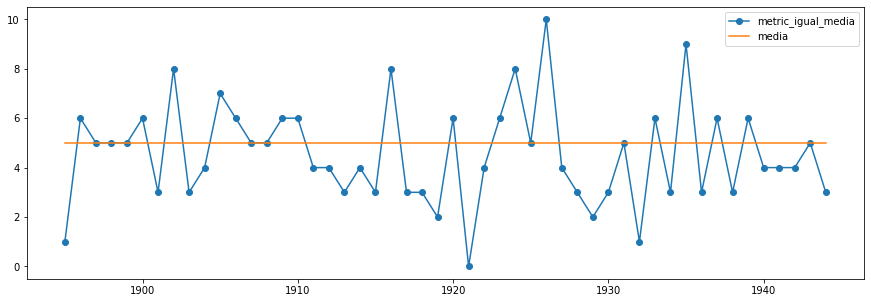

In [312]:
tamanho = 50

coluna = 'metric_igual_media'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

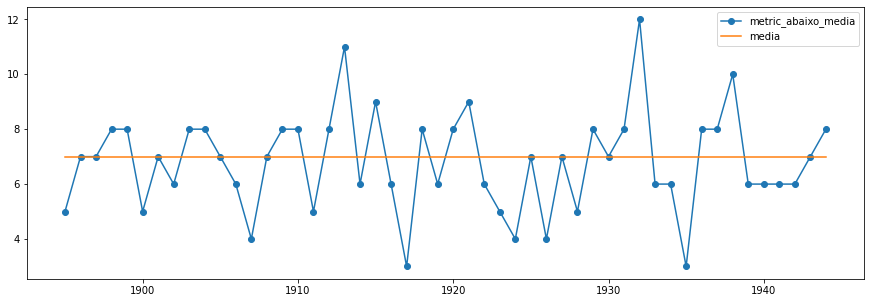

In [313]:
tamanho = 50

coluna = 'metric_abaixo_media'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

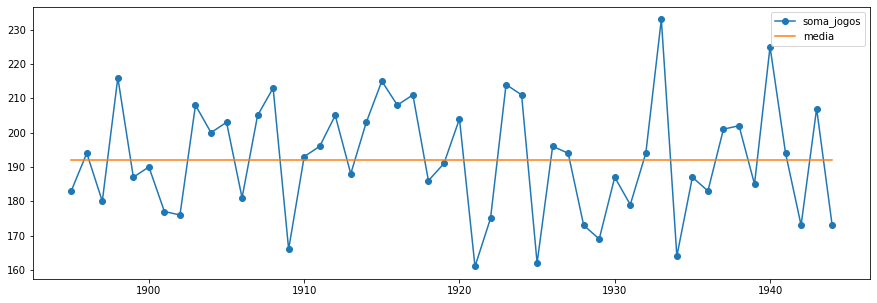

In [314]:
tamanho = 50

coluna = 'soma_jogos'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

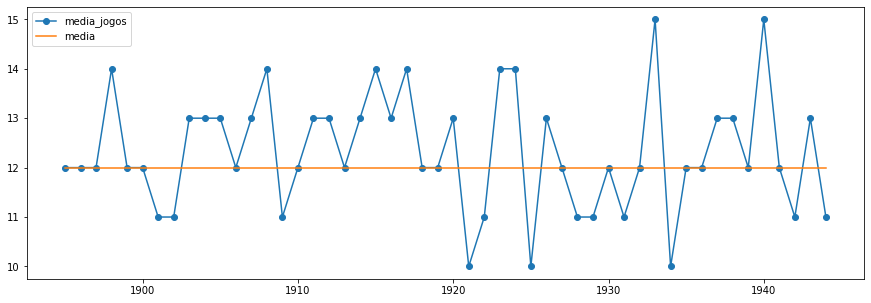

In [315]:
coluna = 'media_jogos'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

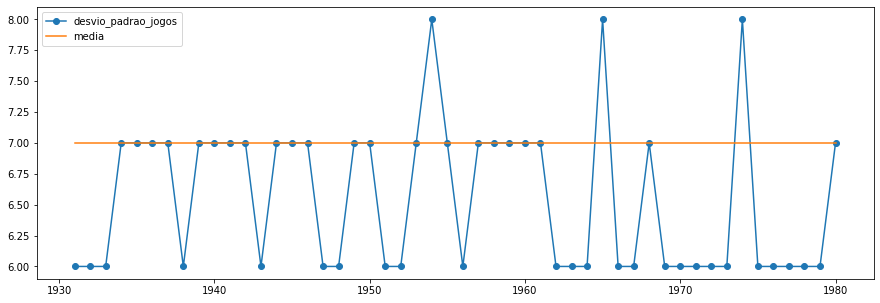

In [116]:

coluna = 'desvio_padrao_jogos'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

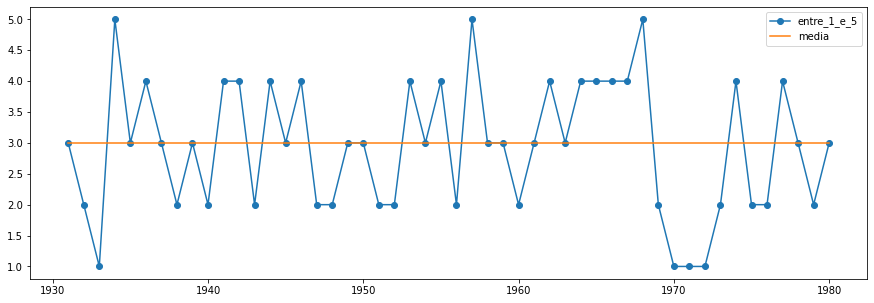

In [117]:

coluna = 'entre_1_e_5'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

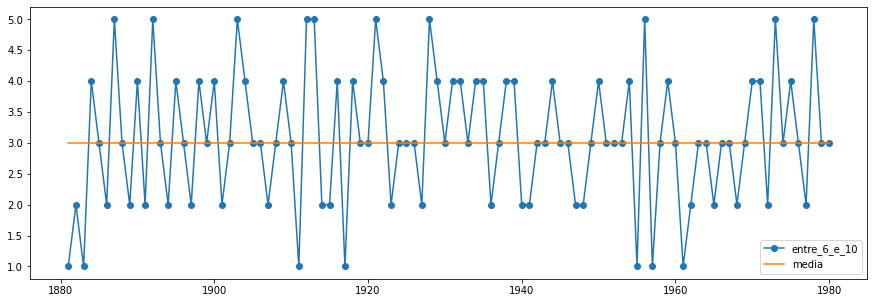

In [118]:
tamanho = 100

coluna = 'entre_6_e_10'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

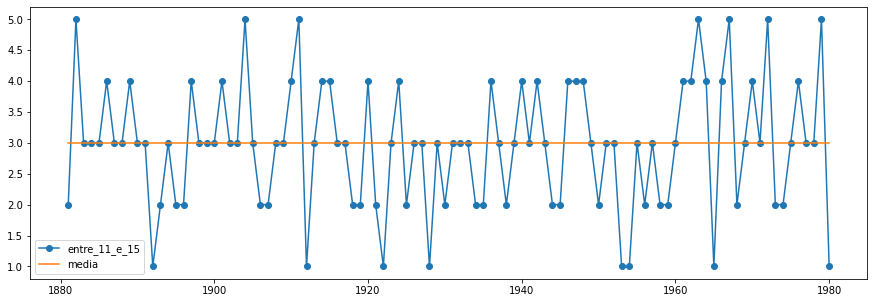

In [119]:

coluna = 'entre_11_e_15'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

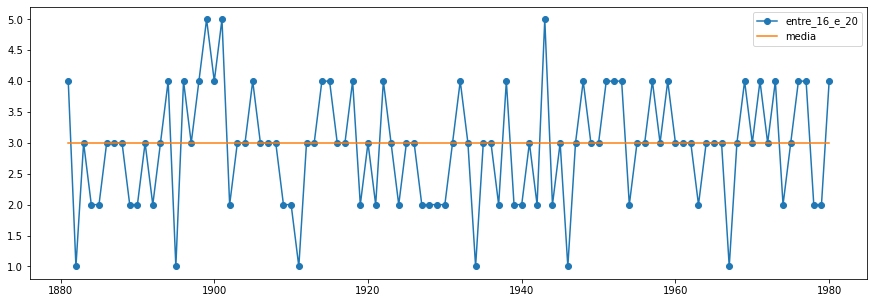

In [120]:

coluna = 'entre_16_e_20'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

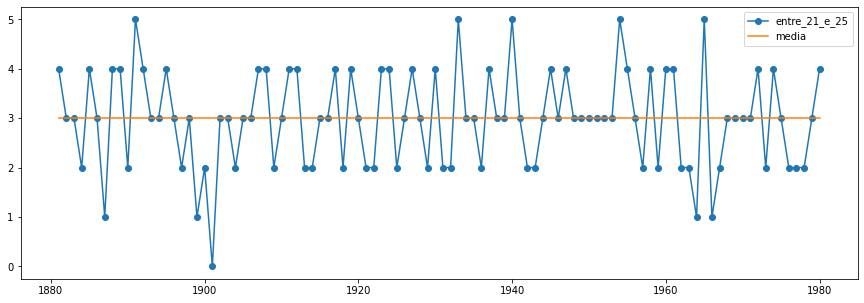

In [121]:

coluna = 'entre_21_e_25'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

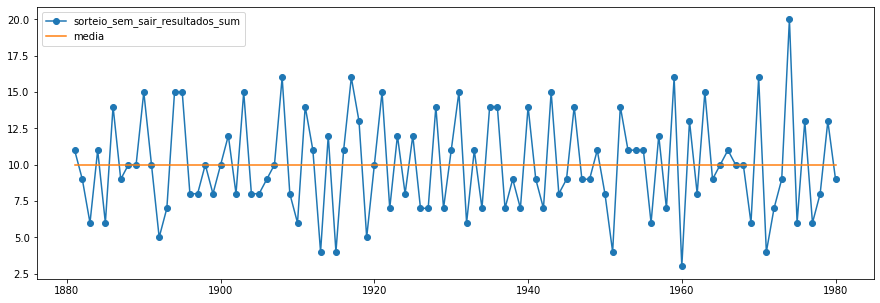

In [122]:
coluna = 'sorteio_sem_sair_resultados_sum'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

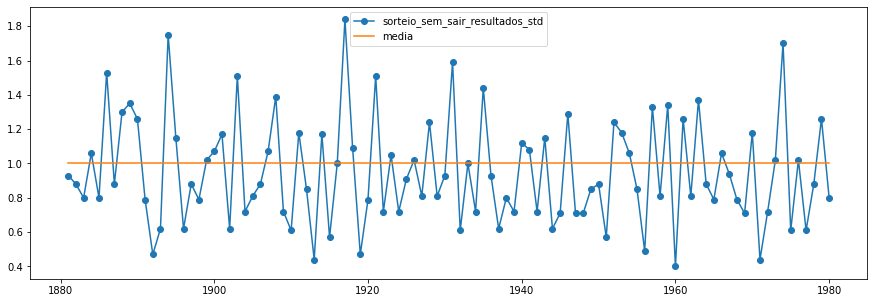

In [123]:
coluna = 'sorteio_sem_sair_resultados_std'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

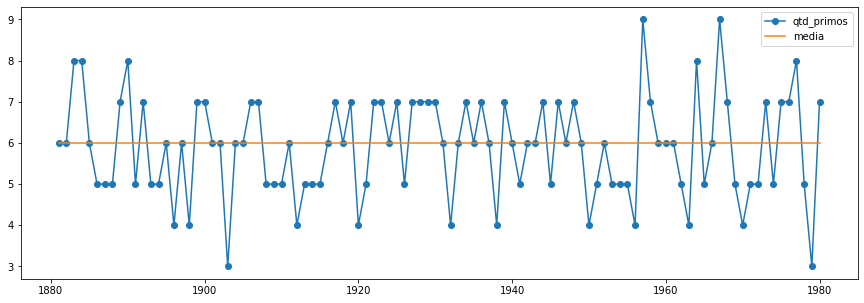

In [124]:
coluna = 'qtd_primos'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

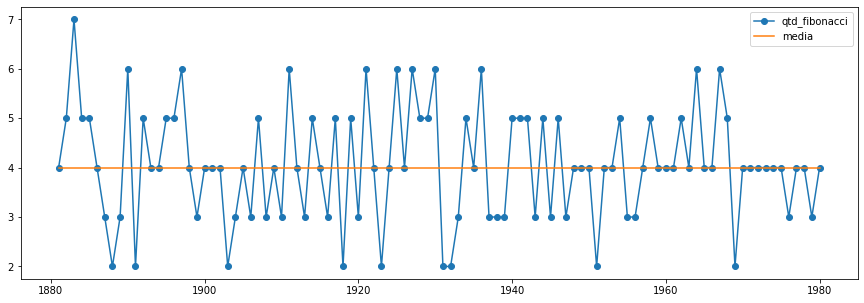

In [125]:
coluna = 'qtd_fibonacci'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

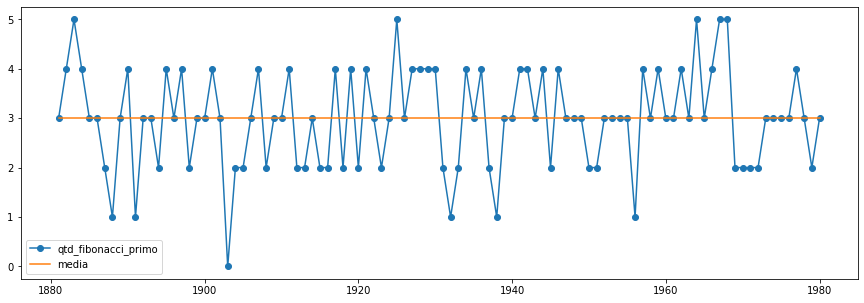

In [126]:
coluna = 'qtd_fibonacci_primo'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

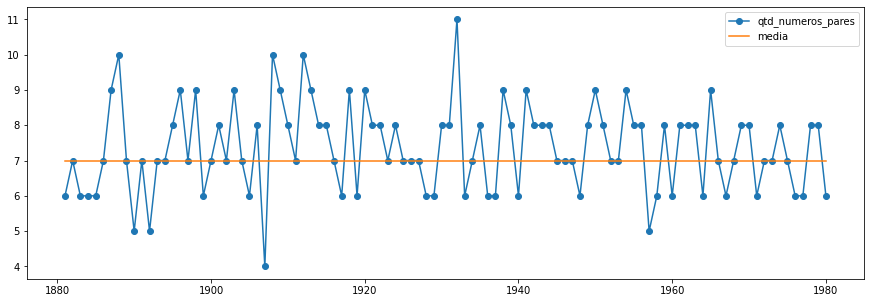

In [127]:
coluna = 'qtd_numeros_pares'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

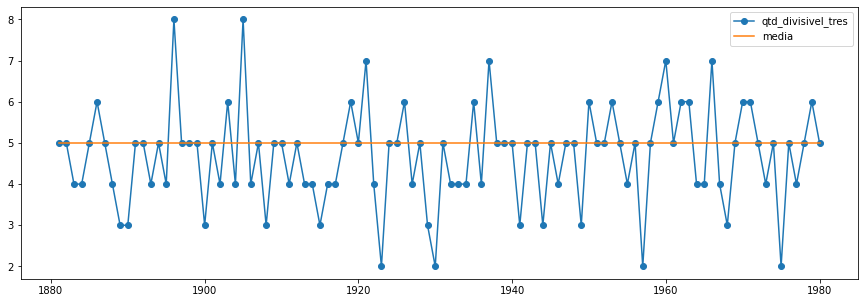

In [128]:
coluna = 'qtd_divisivel_tres'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

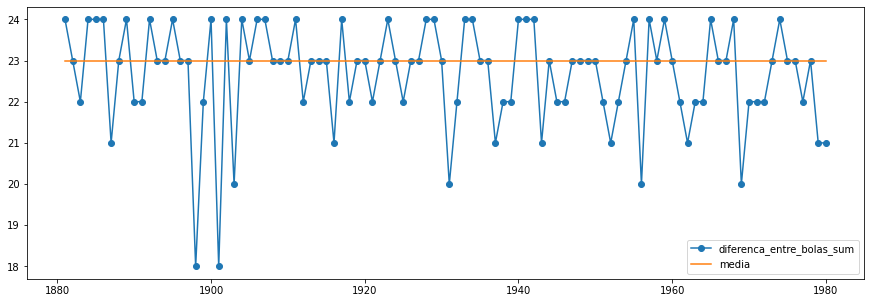

In [129]:
coluna = 'diferenca_entre_bolas_sum'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

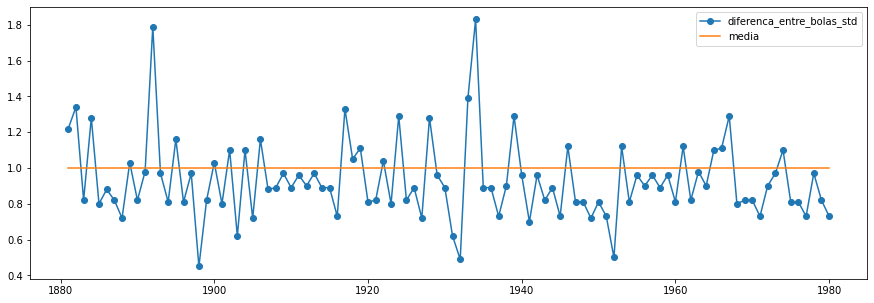

In [130]:
coluna = 'diferenca_entre_bolas_std'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

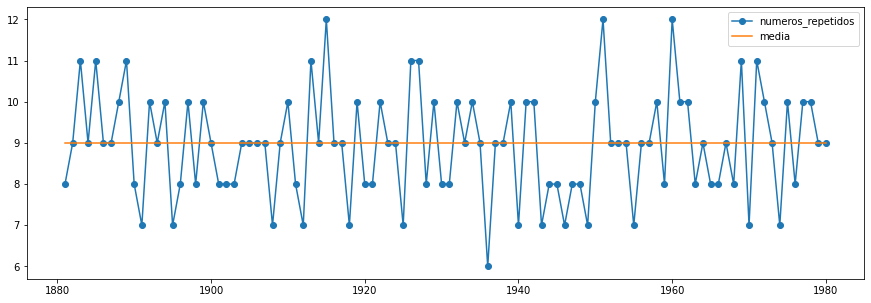

In [131]:
coluna = 'numeros_repetidos'

x_media = lotofacil[coluna].iloc[-tamanho:].index
y_media = list(lotofacil[coluna].iloc[-tamanho:])
figure(figsize=(15,5))
plt.plot(x_media, y_media, label=coluna, marker='o')

lista_y = []
for i in range(tamanho):
    lista_y.append(round(np.mean(list(lotofacil[coluna].iloc[-tamanho:]))))
    
lotofacil[coluna].iloc[-tamanho:]
x_1 = lotofacil[coluna].iloc[-tamanho:].index
y_1 = lista_y#list(mega_sena[coluna_1][limite:end])
plt.plot(x_1, y_1, label='media')

plt.legend()
plt.show()

In [132]:
#[soma_jogos, desvio_padrao_jogos, entre_1_e_5, entre_6_e_10, entre_11_e_15, entre_16_e_20,
# entre_21_e_25, sorteio_sem_sair_resultados_sum, sorteio_sem_sair_resultados_std,
# qtd_primos, qtd_fibonacci, qtd_fibonacci_primo, qtd_numeros_pares, qtd_divisivel_tres, diferenca_entre_bolas_sum,
# diferenca_entre_bolas_std, numeros_repetidos]

In [133]:
%%time

media_soma_jogos = round(np.mean(list(lotofacil['soma_jogos'].iloc[-150:])))
last_soma_jogos = lotofacil['soma_jogos'].iloc[-1]

media_desvio_padrao_jogos = round(np.mean(list(lotofacil['desvio_padrao_jogos'].iloc[-150:])))
last_desvio_padrao_jogos = lotofacil['desvio_padrao_jogos'].iloc[-1]

media_entre_1_e_5 = round(np.mean(list(lotofacil['entre_1_e_5'].iloc[-150:])))
last_entre_1_e_5 = lotofacil['entre_1_e_5'].iloc[-1]

media_entre_6_e_10 = round(np.mean(list(lotofacil['entre_6_e_10'].iloc[-150:])))
last_entre_6_e_10 = lotofacil['entre_6_e_10'].iloc[-1]

media_entre_11_e_15 = round(np.mean(list(lotofacil['entre_11_e_15'].iloc[-150:])))
last_entre_11_e_15 = lotofacil['entre_11_e_15'].iloc[-1]

media_entre_16_e_20 = round(np.mean(list(lotofacil['entre_16_e_20'].iloc[-150:])))
last_entre_16_e_20 = lotofacil['entre_16_e_20'].iloc[-1]

media_entre_21_e_25 = round(np.mean(list(lotofacil['entre_21_e_25'].iloc[-150:])))
last_entre_21_e_25 = lotofacil['entre_21_e_25'].iloc[-1]

media_sorteio_sem_sair_sum = round(np.mean(list(lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-150:])))
last_sorteio_sem_sair_sum = lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-1]

media_sorteio_sem_sair_std = round(np.mean(list(lotofacil['sorteio_sem_sair_resultados_std'].iloc[-150:])))
last_sorteio_sem_sair_std = lotofacil['sorteio_sem_sair_resultados_std'].iloc[-1]

media_qtd_primos = round(np.mean(list(lotofacil['qtd_primos'].iloc[-150:])))
last_qtd_primos = lotofacil['qtd_primos'].iloc[-1]

media_qtd_fibonacci = round(np.mean(list(lotofacil['qtd_fibonacci'].iloc[-150:])))
last_qtd_fibonacci = lotofacil['qtd_fibonacci'].iloc[-1]

media_qtd_fibonacci_primo = round(np.mean(list(lotofacil['qtd_fibonacci_primo'].iloc[-150:])))
last_qtd_fibonacci_primo = lotofacil['qtd_fibonacci_primo'].iloc[-1]

media_qtd_numeros_pares = round(np.mean(list(lotofacil['qtd_numeros_pares'].iloc[-150:])))
last_qtd_numeros_pares = lotofacil['qtd_numeros_pares'].iloc[-1]

media_qtd_divisivel_tres = round(np.mean(list(lotofacil['qtd_divisivel_tres'].iloc[-150:])))
last_qtd_divisivel_tres = lotofacil['qtd_divisivel_tres'].iloc[-1]

media_diferenca_entre_bolas_sum = round(np.mean(list(lotofacil['diferenca_entre_bolas_sum'].iloc[-150:])))
last_diferenca_entre_bolas_sum = lotofacil['diferenca_entre_bolas_sum'].iloc[-1]

media_diferenca_entre_bolas_std = round(np.mean(list(lotofacil['diferenca_entre_bolas_std'].iloc[-150:])))
last_diferenca_entre_bolas_std = lotofacil['diferenca_entre_bolas_std'].iloc[-1]

media_numeros_repetidos = round(np.mean(list(lotofacil['numeros_repetidos'].iloc[-150:])))
last_numeros_repetidos = lotofacil['numeros_repetidos'].iloc[-1]


CPU times: user 3.86 ms, sys: 0 ns, total: 3.86 ms
Wall time: 3.75 ms


In [134]:
#[soma_jogos, desvio_padrao_jogos, entre_1_e_5, entre_6_e_10, entre_11_e_15, entre_16_e_20,
# entre_21_e_25, sorteio_sem_sair_resultados_sum, sorteio_sem_sair_resultados_std,
# qtd_primos, qtd_fibonacci, qtd_fibonacci_primo, qtd_numeros_pares, qtd_divisivel_tres, diferenca_entre_bolas_sum,
# diferenca_entre_bolas_std, numeros_repetidos]

In [136]:
data_jogos['resultados_mean'][0]

[120, 4, 5, 5, 5, 0, 0, 14, 1.29, 7, 6, 5, 7, 5, 14, 0.0, 0]

5     36
4     24
7     23
6     21
8     16
3     15
9      7
2      4
11     2
10     1
1      1
Name: metric_up_media, dtype: int64

In [225]:
#Aqui Aqui
lotofacil[(lotofacil['metric_up_media'] == 1)]

,Concurso,Data,jogos_ordenados,jogos_desordenados,soma_jogos,media_jogos,desvio_padrao_jogos,entre_1_e_5,entre_6_e_10,entre_11_e_15,...,diferenca_entre_bolas,diferenca_entre_bolas_sum,diferenca_entre_bolas_mean,diferenca_entre_bolas_std,numeros_repetidos,resultados_mean,metrics,metric_up_media,metric_igual_media,metric_abaixo_media
Concurso_2,,,,,,,,,,,,,,,,,,,,,
285,285,29/12/2007,"[1, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19...","[11, 16, 8, 10, 14, 1, 4, 5, 15, 22, 9, 12, 19...",182,12,6,3,3,5,...,"[3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1]",22,1.57,0.90,9,"[182, 6, 3, 3, 5, 2, 2, 9, 0.88, 6, 4, 3, 7, 3...","[0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1,7,9
421,421,27/04/2009,"[3, 4, 5, 8, 9, 10, 12, 13, 14, 15, 16, 19, 20...","[25, 10, 14, 4, 5, 15, 9, 3, 13, 20, 16, 8, 19...",196,13,6,3,3,4,...,"[1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 2]",22,1.57,0.82,9,"[196, 6, 3, 3, 4, 3, 2, 7, 0.62, 5, 4, 3, 7, 4...","[1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...",1,8,8
696,696,15/12/2011,"[1, 4, 5, 7, 9, 10, 11, 13, 14, 15, 16, 20, 21...","[5, 20, 15, 4, 9, 7, 22, 13, 24, 16, 11, 21, 1...",192,12,6,3,3,4,...,"[3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2]",23,1.64,0.89,9,"[192, 6, 3, 3, 4, 2, 3, 7, 0.62, 5, 4, 3, 7, 4...","[0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, ...",1,8,8
1137,1137,26/11/2014,"[2, 4, 5, 7, 8, 9, 10, 11, 12, 15, 19, 20, 21,...","[23, 21, 15, 8, 9, 2, 5, 19, 11, 4, 20, 12, 7,...",191,12,7,3,4,3,...,"[2, 1, 2, 1, 1, 1, 1, 1, 3, 4, 1, 1, 2, 2]",23,1.64,0.89,9,"[191, 7, 3, 4, 3, 2, 3, 7, 0.62, 6, 4, 2, 6, 4...","[0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, ...",1,8,8
1323,1323,15/02/2016,"[1, 4, 5, 6, 9, 10, 11, 13, 14, 17, 19, 20, 21...","[19, 23, 6, 5, 1, 11, 4, 14, 20, 9, 10, 13, 21...",195,13,6,3,3,3,...,"[3, 1, 1, 3, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1]",22,1.57,0.82,7,"[195, 6, 3, 3, 3, 3, 3, 10, 0.7, 7, 4, 3, 6, 3...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, ...",1,8,8
1374,1374,13/06/2016,"[2, 3, 4, 5, 6, 9, 10, 14, 15, 16, 19, 20, 21,...","[9, 4, 19, 23, 15, 3, 2, 5, 16, 6, 10, 14, 20,...",192,12,7,4,3,2,...,"[1, 1, 1, 1, 3, 1, 4, 1, 1, 3, 1, 1, 2, 2]",23,1.64,0.97,8,"[192, 7, 4, 3, 2, 3, 3, 10, 0.87, 5, 4, 3, 7, ...","[0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...",1,10,6
1398,1398,08/08/2016,"[1, 4, 5, 6, 7, 8, 11, 14, 15, 16, 19, 20, 21,...","[24, 8, 5, 16, 14, 21, 7, 11, 15, 20, 4, 25, 1...",196,13,7,3,3,3,...,"[3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1]",24,1.71,0.96,9,"[196, 7, 3, 3, 3, 3, 3, 9, 0.88, 5, 4, 2, 7, 4...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2, ...",1,10,6
1893,1893,21/11/2019,"[2, 3, 4, 5, 7, 9, 10, 14, 15, 16, 19, 20, 21,...","[14, 15, 10, 25, 7, 22, 21, 19, 2, 3, 5, 9, 16...",192,12,7,4,3,2,...,"[1, 1, 1, 2, 2, 1, 4, 1, 1, 3, 1, 1, 1, 3]",23,1.64,0.97,9,"[192, 7, 4, 3, 2, 3, 3, 7, 0.62, 5, 4, 3, 7, 4...","[0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, ...",1,9,7


In [141]:
lotofacil['metric_up_media'].iloc[-50:].value_counts()

4    13
5    10
7     8
6     7
8     6
3     5
2     1
Name: metric_up_media, dtype: int64

In [142]:
# Possibiliadade em Relacao ao Ultimo Ponto

In [143]:
%%time

def get_games(df: pd.DataFrame) -> list:
    
    index = df.index
    soma = []
    std = []
    um_e_5 = []
    seis_e_10 = []
    onze_e_15 = []
    dezesseis_20 = []
    vinte_um_e_25 = []
    sorteio_sair_sum = []
    sorteio_sair_std = []
    primos = []
    fibo = []
    fibo_primo = []
    pares = []
    div_tres = []
    diferenca_bolas_sum = []
    diferenca_bolas_std = []
    num_repetido = []
    
    resultados = list(df['resultados_mean'])
    
    if(last_soma_jogos >= media_soma_jogos):
        for sorteios in index:
            if (resultados[sorteios][0] <= last_soma_jogos):
                soma.append(sorteios)
    else:
        for sorteios in index:
            if (resultados[sorteios][0] >= last_soma_jogos):
                soma.append(sorteios)
        
    if(last_desvio_padrao_jogos >= media_desvio_padrao_jogos):
        for sorteios in soma:
            if (resultados[sorteios][1] <= last_desvio_padrao_jogos):
                std.append(sorteios)
    else:
        for sorteios in soma:
            if (resultados[sorteios][1] >= last_desvio_padrao_jogos):
                std.append(sorteios)
    
    
    if(last_entre_1_e_5 >= media_entre_1_e_5):
        for sorteios in std:
            if (resultados[sorteios][2] <= last_entre_1_e_5):
                um_e_5.append(sorteios)
    else:
        for sorteios in std:
            if (resultados[sorteios][2] >= last_entre_1_e_5):
                um_e_5.append(sorteios)

    if(last_entre_6_e_10 >= media_entre_6_e_10 ):
        for sorteios in um_e_5:
            if (resultados[sorteios][3] <= last_entre_6_e_10):
                seis_e_10.append(sorteios)
    else:
        for sorteios in um_e_5:
            if (resultados[sorteios][3] >= last_entre_6_e_10):
                seis_e_10.append(sorteios)
    
    if(last_entre_11_e_15 >= media_entre_11_e_15):
        for sorteios in seis_e_10:
            if (resultados[sorteios][4] <= last_entre_11_e_15):
                onze_e_15.append(sorteios)
    else:
        for sorteios in seis_e_10:
            if (resultados[sorteios][4] >= last_entre_11_e_15):
                onze_e_15.append(sorteios)

    if(last_entre_16_e_20 >= media_entre_16_e_20):
        for sorteios in onze_e_15:
            if (resultados[sorteios][5] <= last_entre_16_e_20):
                dezesseis_20.append(sorteios)
    else:
        for sorteios in onze_e_15:
            if (resultados[sorteios][5] >= last_entre_16_e_20):
                dezesseis_20.append(sorteios)
        
    if(last_entre_21_e_25 >= media_entre_21_e_25):
        for sorteios in dezesseis_20:
            if (resultados[sorteios][6] <= last_entre_21_e_25):
                vinte_um_e_25.append(sorteios)
    else:
        for sorteios in dezesseis_20:
            if (resultados[sorteios][6] >= last_entre_21_e_25):
                vinte_um_e_25.append(sorteios)

    if(last_sorteio_sem_sair_sum >= media_sorteio_sem_sair_sum):
        for sorteios in vinte_um_e_25:
            if (resultados[sorteios][7] <= last_sorteio_sem_sair_sum):
                sorteio_sair_sum.append(sorteios)
    else:
        for sorteios in vinte_um_e_25:
            if (resultados[sorteios][7] >= last_sorteio_sem_sair_sum):
                sorteio_sair_sum.append(sorteios)

    if(last_sorteio_sem_sair_std >= media_sorteio_sem_sair_std):
        for sorteios in sorteio_sair_sum:
            if (resultados[sorteios][8] <= last_sorteio_sem_sair_std):
                sorteio_sair_std.append(sorteios)
    else:
        for sorteios in sorteio_sair_sum:
            if (resultados[sorteios][8] >= last_sorteio_sem_sair_std):
                sorteio_sair_std.append(sorteios)
    
    if(last_qtd_primos >= media_qtd_primos):
        for sorteios in sorteio_sair_std:
            if (resultados[sorteios][9] <= last_qtd_primos):
                primos.append(sorteios)
    else:
        for sorteios in sorteio_sair_std:
            if (resultados[sorteios][9] >= last_qtd_primos):
                primos.append(sorteios)
    
    if(last_qtd_fibonacci >= media_qtd_fibonacci):
        for sorteios in primos:
            if (resultados[sorteios][10] <= last_qtd_fibonacci):
                fibo.append(sorteios)
    else:
        for sorteios in primos:
            if (resultados[sorteios][10] >= last_qtd_fibonacci):
                fibo.append(sorteios)
    
    if(last_qtd_fibonacci_primo >= media_qtd_fibonacci_primo):
        for sorteios in fibo:
            if (resultados[sorteios][11] <= last_qtd_fibonacci_primo):
                fibo_primo.append(sorteios)
    else:
        for sorteios in fibo:
            if (resultados[sorteios][11] >= last_qtd_fibonacci_primo):
                fibo_primo.append(sorteios)
     
    if(last_qtd_numeros_pares >= media_qtd_numeros_pares):
        for sorteios in fibo_primo:
            if (resultados[sorteios][12] <= last_qtd_numeros_pares):
                pares.append(sorteios)
    else:
        for sorteios in fibo_primo:
            if (resultados[sorteios][12] >= last_qtd_numeros_pares):
                pares.append(sorteios)
    
    if(last_qtd_divisivel_tres >= media_qtd_divisivel_tres):
        for sorteios in pares:
            if (resultados[sorteios][13] <= last_qtd_divisivel_tres):
                div_tres.append(sorteios)
    else:
        for sorteios in pares:
            if (resultados[sorteios][13] >= last_qtd_divisivel_tres):
                div_tres.append(sorteios)
                
    if(last_diferenca_entre_bolas_sum >= media_diferenca_entre_bolas_sum):
        for sorteios in div_tres:
            if (resultados[sorteios][14] <= last_diferenca_entre_bolas_sum):
                diferenca_bolas_sum.append(sorteios)
    else:
        for sorteios in div_tres:
            if (resultados[sorteios][14] >= last_diferenca_entre_bolas_sum):
                diferenca_bolas_sum.append(sorteios)

    if(last_diferenca_entre_bolas_std >= media_diferenca_entre_bolas_std):
        for sorteios in diferenca_bolas_sum:
            if (resultados[sorteios][15] <= last_diferenca_entre_bolas_std):
                diferenca_bolas_std.append(sorteios)
    else:
        for sorteios in diferenca_bolas_sum:
            if (resultados[sorteios][15] >= last_diferenca_entre_bolas_std):
                diferenca_bolas_std.append(sorteios)

    if(last_numeros_repetidos >= media_numeros_repetidos):
        for sorteios in diferenca_bolas_std:
            if (resultados[sorteios][16] <= last_numeros_repetidos):
                num_repetido.append(sorteios)
    else:
        for sorteios in diferenca_bolas_std:
            if (resultados[sorteios][16] >= last_numeros_repetidos):
                num_repetido.append(sorteios)
    
    #return num_repetido
    return fibo
    
lista_final_2 = get_games(data_jogos)

CPU times: user 6.56 s, sys: 7.31 ms, total: 6.57 s
Wall time: 6.56 s


In [144]:
len(lista_final_2)

271819

In [145]:
resultado_teste in list(data_jogos.iloc[lista_final_2]['jogos_ordenados'])

False

In [146]:
# Possibiliadade em Relação a media

In [147]:
%%time

def get_games(df: pd.DataFrame) -> list:
    
    index = df.index
    soma = []
    std = []
    um_e_5 = []
    seis_e_10 = []
    onze_e_15 = []
    dezesseis_20 = []
    vinte_um_e_25 = []
    sorteio_sair_sum = []
    sorteio_sair_std = []
    primos = []
    fibo = []
    fibo_primo = []
    pares = []
    div_tres = []
    diferenca_bolas_sum = []
    diferenca_bolas_std = []
    num_repetido = []
    
    resultados = list(df['resultados_mean']) 
    
    if(last_soma_jogos >= media_soma_jogos):
        for sorteios in index:
            if (resultados[sorteios][0] <= media_soma_jogos):
                soma.append(sorteios)
    else:
        for sorteios in index:
            if (resultados[sorteios][0] >= media_soma_jogos):
                soma.append(sorteios)
        
    if(last_desvio_padrao_jogos >= media_desvio_padrao_jogos):
        for sorteios in soma:
            if (resultados[sorteios][1] <= media_desvio_padrao_jogos):
                std.append(sorteios)
    else:
        for sorteios in soma:
            if (resultados[sorteios][1] >= media_desvio_padrao_jogos):
                std.append(sorteios)
    

    if(last_entre_1_e_5 >= media_entre_1_e_5):
        for sorteios in std:
            if (resultados[sorteios][2] <= media_entre_1_e_5):
                um_e_5.append(sorteios)
    else:
        for sorteios in std:
            if (resultados[sorteios][2] >= media_entre_1_e_5):
                um_e_5.append(sorteios)

    if(last_entre_6_e_10 >= media_entre_6_e_10 ):
        for sorteios in um_e_5:
            if (resultados[sorteios][3] <= media_entre_6_e_10):
                seis_e_10.append(sorteios)
    else:
        for sorteios in um_e_5:
            if (resultados[sorteios][3] >= media_entre_6_e_10):
                seis_e_10.append(sorteios)
    
    if(last_entre_11_e_15 >= media_entre_11_e_15):
        for sorteios in seis_e_10:
            if (resultados[sorteios][4] <= media_entre_11_e_15):
                onze_e_15.append(sorteios)
    else:
        for sorteios in seis_e_10:
            if (resultados[sorteios][4] >= media_entre_11_e_15):
                onze_e_15.append(sorteios)

    if(last_entre_16_e_20 >= media_entre_16_e_20):
        for sorteios in onze_e_15:
            if (resultados[sorteios][5] <= media_entre_16_e_20):
                dezesseis_20.append(sorteios)
    else:
        for sorteios in onze_e_15:
            if (resultados[sorteios][5] >= media_entre_16_e_20):
                dezesseis_20.append(sorteios)
        
    if(last_entre_21_e_25 >= media_entre_21_e_25):
        for sorteios in dezesseis_20:
            if (resultados[sorteios][6] <= media_entre_21_e_25):
                vinte_um_e_25.append(sorteios)
    else:
        for sorteios in dezesseis_20:
            if (resultados[sorteios][6] >= media_entre_21_e_25):
                vinte_um_e_25.append(sorteios)

    if(last_sorteio_sem_sair_sum >= media_sorteio_sem_sair_sum):
        for sorteios in vinte_um_e_25:
            if (resultados[sorteios][7] <= media_sorteio_sem_sair_sum):
                sorteio_sair_sum.append(sorteios)
    else:
        for sorteios in vinte_um_e_25:
            if (resultados[sorteios][7] >= media_sorteio_sem_sair_sum):
                sorteio_sair_sum.append(sorteios)

    if(last_sorteio_sem_sair_std >= media_sorteio_sem_sair_std):
        for sorteios in sorteio_sair_sum:
            if (resultados[sorteios][8] <= media_sorteio_sem_sair_std):
                sorteio_sair_std.append(sorteios)
    else:
        for sorteios in sorteio_sair_sum:
            if (resultados[sorteios][8] >= media_sorteio_sem_sair_std):
                sorteio_sair_std.append(sorteios)
    
    if(last_qtd_primos >= media_qtd_primos):
        for sorteios in sorteio_sair_std:
            if (resultados[sorteios][9] <= media_qtd_primos):
                primos.append(sorteios)
    else:
        for sorteios in sorteio_sair_std:
            if (resultados[sorteios][9] >= media_qtd_primos):
                primos.append(sorteios)
    
    if(last_qtd_fibonacci >= media_qtd_fibonacci):
        for sorteios in primos:
            if (resultados[sorteios][10] <= media_qtd_fibonacci):
                fibo.append(sorteios)
    else:
        for sorteios in primos:
            if (resultados[sorteios][10] >= media_qtd_fibonacci):
                fibo.append(sorteios)
    
    if(last_qtd_fibonacci_primo >= media_qtd_fibonacci_primo):
        for sorteios in fibo:
            if (resultados[sorteios][11] <= media_qtd_fibonacci_primo):
                fibo_primo.append(sorteios)
    else:
        for sorteios in fibo:
            if (resultados[sorteios][11] >= media_qtd_fibonacci_primo):
                fibo_primo.append(sorteios)
     
    if(last_qtd_numeros_pares >= media_qtd_numeros_pares):
        for sorteios in fibo_primo:
            if (resultados[sorteios][12] <= media_qtd_numeros_pares):
                pares.append(sorteios)
    else:
        for sorteios in fibo_primo:
            if (resultados[sorteios][12] >= media_qtd_numeros_pares):
                pares.append(sorteios)
    
    if(last_qtd_divisivel_tres >= media_qtd_divisivel_tres):
        for sorteios in pares:
            if (resultados[sorteios][13] <= media_qtd_divisivel_tres):
                div_tres.append(sorteios)
    else:
        for sorteios in pares:
            if (resultados[sorteios][13] >= media_qtd_divisivel_tres):
                div_tres.append(sorteios)
                
    if(last_diferenca_entre_bolas_sum >= media_diferenca_entre_bolas_sum):
        for sorteios in div_tres:
            if (resultados[sorteios][14] <= media_diferenca_entre_bolas_sum):
                diferenca_bolas_sum.append(sorteios)
    else:
        for sorteios in div_tres:
            if (resultados[sorteios][14] >= media_diferenca_entre_bolas_sum):
                diferenca_bolas_sum.append(sorteios)

    if(last_diferenca_entre_bolas_std >= media_diferenca_entre_bolas_std):
        for sorteios in diferenca_bolas_sum:
            if (resultados[sorteios][15] <= media_diferenca_entre_bolas_std):
                diferenca_bolas_std.append(sorteios)
    else:
        for sorteios in diferenca_bolas_sum:
            if (resultados[sorteios][15] >= media_diferenca_entre_bolas_std):
                diferenca_bolas_std.append(sorteios)

    if(last_numeros_repetidos >= media_numeros_repetidos):
        for sorteios in diferenca_bolas_std:
            if (resultados[sorteios][16] <= media_numeros_repetidos):
                num_repetido.append(sorteios)
    else:
        for sorteios in diferenca_bolas_std:
            if (resultados[sorteios][16] >= media_numeros_repetidos):
                num_repetido.append(sorteios)
    
    return sorteio_sair_sum
    
lista_final_3 = get_games(data_jogos)

CPU times: user 1.84 s, sys: 6.69 ms, total: 1.85 s
Wall time: 1.85 s


In [148]:
len(lista_final_3)

141688

In [149]:
resultado_teste in list(data_jogos.iloc[lista_final_3]['jogos_ordenados'])

False

In [150]:
# Possibilidades Levando em Conta as ultimas estatisticas igual a média

In [151]:
%%time

media_soma_jogos = round(np.mean(list(lotofacil['soma_jogos'].iloc[-150:])))
last_soma_jogos = lotofacil['soma_jogos'].iloc[-1]

if last_soma_jogos == media_soma_jogos:
    last_soma_jogos = np.mean(lotofacil['soma_jogos'].iloc[-2:])
    if last_soma_jogos == media_soma_jogos:
        last_soma_jogos = np.mean(lotofacil['soma_jogos'].iloc[-3:])

media_desvio_padrao_jogos = round(np.mean(list(lotofacil['desvio_padrao_jogos'].iloc[-150:])))
last_desvio_padrao_jogos = lotofacil['desvio_padrao_jogos'].iloc[-1]

if last_desvio_padrao_jogos == media_desvio_padrao_jogos:
    last_desvio_padrao_jogos = np.mean(lotofacil['desvio_padrao_jogos'].iloc[-2:])
    if last_desvio_padrao_jogos == media_desvio_padrao_jogos:
        last_desvio_padrao_jogos = np.mean(lotofacil['desvio_padrao_jogos'].iloc[-3:])
        if last_desvio_padrao_jogos == media_desvio_padrao_jogos:
            last_desvio_padrao_jogos = np.mean(lotofacil['desvio_padrao_jogos'].iloc[-4:])
            if last_desvio_padrao_jogos == media_desvio_padrao_jogos:
                last_desvio_padrao_jogos = np.mean(lotofacil['desvio_padrao_jogos'].iloc[-5:])
                if last_desvio_padrao_jogos == media_desvio_padrao_jogos:
                    last_desvio_padrao_jogos = np.mean(lotofacil['desvio_padrao_jogos'].iloc[-6:])

            
            
media_entre_1_e_5 = round(np.mean(list(lotofacil['entre_1_e_5'].iloc[-150:])))
last_entre_1_e_5 = lotofacil['entre_1_e_5'].iloc[-1]

if last_entre_1_e_5 == media_entre_1_e_5:
    last_entre_1_e_5 = np.mean(lotofacil['entre_1_e_5'].iloc[-2:])
    if last_entre_1_e_5 == media_entre_1_e_5:
        last_entre_1_e_5 = np.mean(lotofacil['entre_1_e_5'].iloc[-3:])
        if last_entre_1_e_5 == media_entre_1_e_5:
            last_entre_1_e_5 = np.mean(lotofacil['entre_1_e_5'].iloc[-4:])
            if last_entre_1_e_5 == media_entre_1_e_5:
                last_entre_1_e_5 = np.mean(lotofacil['entre_1_e_5'].iloc[-5:])

media_entre_6_e_10 = round(np.mean(list(lotofacil['entre_6_e_10'].iloc[-150:])))
last_entre_6_e_10 = lotofacil['entre_6_e_10'].iloc[-1]

if last_entre_6_e_10 == media_entre_6_e_10:
    last_entre_6_e_10 = np.mean(lotofacil['entre_6_e_10'].iloc[-2:])
    if last_entre_6_e_10 == media_entre_6_e_10:
        last_entre_6_e_10 = np.mean(lotofacil['entre_6_e_10'].iloc[-3:])
        if last_entre_6_e_10 == media_entre_6_e_10:
            last_entre_6_e_10 = np.mean(lotofacil['entre_6_e_10'].iloc[-4:])

media_entre_11_e_15 = round(np.mean(list(lotofacil['entre_11_e_15'].iloc[-150:])))
last_entre_11_e_15 = lotofacil['entre_11_e_15'].iloc[-1]

if last_entre_11_e_15 == media_entre_11_e_15:
    last_entre_11_e_15 = np.mean(lotofacil['entre_11_e_15'].iloc[-2:])

media_entre_16_e_20 = round(np.mean(list(lotofacil['entre_16_e_20'].iloc[-150:])))
last_entre_16_e_20 = lotofacil['entre_16_e_20'].iloc[-1]

if last_entre_16_e_20 == media_entre_16_e_20:
    last_entre_16_e_20 = np.mean(lotofacil['entre_16_e_20'].iloc[-2:])
    if last_entre_16_e_20 == media_entre_16_e_20:
        last_entre_16_e_20 = np.mean(lotofacil['entre_16_e_20'].iloc[-3:])
        if last_entre_16_e_20 == media_entre_16_e_20:
            last_entre_16_e_20 = np.mean(lotofacil['entre_16_e_20'].iloc[-4:])

media_entre_21_e_25 = round(np.mean(list(lotofacil['entre_21_e_25'].iloc[-150:])))
last_entre_21_e_25 = lotofacil['entre_21_e_25'].iloc[-1]

if last_entre_21_e_25 == media_entre_21_e_25:
    last_entre_21_e_25 = np.mean(lotofacil['entre_21_e_25'].iloc[-2:])
    if last_entre_21_e_25 == media_entre_21_e_25:
        last_entre_21_e_25 = np.mean(lotofacil['entre_21_e_25'].iloc[-3:])
        if last_entre_21_e_25 == media_entre_21_e_25:
            last_entre_21_e_25 = np.mean(lotofacil['entre_21_e_25'].iloc[-4:])
            if last_entre_21_e_25 == media_entre_21_e_25:
                last_entre_21_e_25 = np.mean(lotofacil['entre_21_e_25'].iloc[-5:])
                if last_entre_21_e_25 == media_entre_21_e_25:
                    last_entre_21_e_25 = np.mean(lotofacil['entre_21_e_25'].iloc[-6:])
                    if last_entre_21_e_25 == media_entre_21_e_25:
                        last_entre_21_e_25 = np.mean(lotofacil['entre_21_e_25'].iloc[-7:])

media_sorteio_sem_sair_sum = round(np.mean(list(lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-150:])))
last_sorteio_sem_sair_sum = lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-1]

if last_sorteio_sem_sair_sum == media_sorteio_sem_sair_sum:
    last_sorteio_sem_sair_sum = np.mean(lotofacil['sorteio_sem_sair_resultados_sum'].iloc[-2:])

media_sorteio_sem_sair_std = round(np.mean(list(lotofacil['sorteio_sem_sair_resultados_std'].iloc[-150:])))
last_sorteio_sem_sair_std = lotofacil['sorteio_sem_sair_resultados_std'].iloc[-1]

media_qtd_primos = round(np.mean(list(lotofacil['qtd_primos'].iloc[-150:])))
last_qtd_primos = lotofacil['qtd_primos'].iloc[-1]

if last_qtd_primos == media_qtd_primos:
    last_qtd_primos = np.mean(lotofacil['qtd_primos'].iloc[-2:])
    if last_qtd_primos == media_qtd_primos:
        last_qtd_primos = np.mean(lotofacil['qtd_primos'].iloc[-3:])
        if last_qtd_primos == media_qtd_primos:
            last_qtd_primos = np.mean(lotofacil['qtd_primos'].iloc[-4:])

media_qtd_fibonacci = round(np.mean(list(lotofacil['qtd_fibonacci'].iloc[-150:])))
last_qtd_fibonacci = lotofacil['qtd_fibonacci'].iloc[-1]

if last_qtd_fibonacci == media_qtd_fibonacci:
    last_qtd_fibonacci = np.mean(lotofacil['qtd_fibonacci'].iloc[-2:])
    if last_qtd_fibonacci == media_qtd_fibonacci:
        last_qtd_fibonacci = np.mean(lotofacil['qtd_fibonacci'].iloc[-3:])
        if last_qtd_fibonacci == media_qtd_fibonacci:
            last_qtd_fibonacci = np.mean(lotofacil['qtd_fibonacci'].iloc[-4:])
            if last_qtd_fibonacci == media_qtd_fibonacci:
                last_qtd_fibonacci = np.mean(lotofacil['qtd_fibonacci'].iloc[-5:])
                if last_qtd_fibonacci == media_qtd_fibonacci:
                    last_qtd_fibonacci = np.mean(lotofacil['qtd_fibonacci'].iloc[-6:])

media_qtd_fibonacci_primo = round(np.mean(list(lotofacil['qtd_fibonacci_primo'].iloc[-150:])))
last_qtd_fibonacci_primo = lotofacil['qtd_fibonacci_primo'].iloc[-1]

if last_qtd_fibonacci_primo == media_qtd_fibonacci_primo:
    last_qtd_fibonacci_primo = np.mean(lotofacil['qtd_fibonacci_primo'].iloc[-2:])
    if last_qtd_fibonacci_primo == media_qtd_fibonacci_primo:
        last_qtd_fibonacci_primo = np.mean(lotofacil['qtd_fibonacci_primo'].iloc[-3:])
        if last_qtd_fibonacci_primo == media_qtd_fibonacci_primo:
            last_qtd_fibonacci_primo = np.mean(lotofacil['qtd_fibonacci_primo'].iloc[-4:])
            if last_qtd_fibonacci_primo == media_qtd_fibonacci_primo:
                last_qtd_fibonacci_primo = np.mean(lotofacil['qtd_fibonacci_primo'].iloc[-5:])

        
media_qtd_numeros_pares = round(np.mean(list(lotofacil['qtd_numeros_pares'].iloc[-150:])))
last_qtd_numeros_pares = lotofacil['qtd_numeros_pares'].iloc[-1]

if last_qtd_numeros_pares == media_qtd_numeros_pares:
    last_qtd_numeros_pares = np.mean(lotofacil['qtd_numeros_pares'].iloc[-2:])
    if last_qtd_numeros_pares == media_qtd_numeros_pares:
        last_qtd_numeros_pares = np.mean(lotofacil['qtd_numeros_pares'].iloc[-3:])
        if last_qtd_numeros_pares == media_qtd_numeros_pares:
            last_qtd_numeros_pares = np.mean(lotofacil['qtd_numeros_pares'].iloc[-4:])

media_qtd_divisivel_tres = round(np.mean(list(lotofacil['qtd_divisivel_tres'].iloc[-150:])))
last_qtd_divisivel_tres = lotofacil['qtd_divisivel_tres'].iloc[-1]

if last_qtd_divisivel_tres == media_qtd_divisivel_tres:
    last_qtd_divisivel_tres = np.mean(lotofacil['qtd_divisivel_tres'].iloc[-2:])
    if last_qtd_divisivel_tres == media_qtd_divisivel_tres:
        last_qtd_divisivel_tres = np.mean(lotofacil['qtd_divisivel_tres'].iloc[-3:])

media_diferenca_entre_bolas_sum = round(np.mean(list(lotofacil['diferenca_entre_bolas_sum'].iloc[-150:])))
last_diferenca_entre_bolas_sum = lotofacil['diferenca_entre_bolas_sum'].iloc[-1]

if last_diferenca_entre_bolas_sum == media_diferenca_entre_bolas_sum:
    last_diferenca_entre_bolas_sum = np.mean(lotofacil['diferenca_entre_bolas_sum'].iloc[-2:])
    if last_diferenca_entre_bolas_sum == media_diferenca_entre_bolas_sum:
        last_diferenca_entre_bolas_sum = np.mean(lotofacil['diferenca_entre_bolas_sum'].iloc[-3:])
        if last_diferenca_entre_bolas_sum == media_diferenca_entre_bolas_sum:
            last_diferenca_entre_bolas_sum = np.mean(lotofacil['diferenca_entre_bolas_sum'].iloc[-4:])
            if last_diferenca_entre_bolas_sum == media_diferenca_entre_bolas_sum:
                last_diferenca_entre_bolas_sum = np.mean(lotofacil['diferenca_entre_bolas_sum'].iloc[-5:])

media_diferenca_entre_bolas_std = round(np.mean(list(lotofacil['diferenca_entre_bolas_std'].iloc[-150:])))
last_diferenca_entre_bolas_std = lotofacil['diferenca_entre_bolas_std'].iloc[-1]

        
media_numeros_repetidos = round(np.mean(list(lotofacil['numeros_repetidos'].iloc[-150:])))
last_numeros_repetidos = lotofacil['numeros_repetidos'].iloc[-1]

if last_numeros_repetidos == media_numeros_repetidos:
    last_numeros_repetidos = np.mean(lotofacil['numeros_repetidos'].iloc[-2:])
    if last_numeros_repetidos == media_numeros_repetidos:
        last_numeros_repetidos = np.mean(lotofacil['numeros_repetidos'].iloc[-3:])
        if last_numeros_repetidos == media_numeros_repetidos:
            last_numeros_repetidos = np.mean(lotofacil['numeros_repetidos'].iloc[-4:])


CPU times: user 6.99 ms, sys: 0 ns, total: 6.99 ms
Wall time: 7 ms


In [152]:
# Em relacao ao ultimo ponto

In [153]:
%%time

def get_games(df: pd.DataFrame) -> list:
    
    index = df.index
    soma = []
    std = []
    um_e_5 = []
    seis_e_10 = []
    onze_e_15 = []
    dezesseis_20 = []
    vinte_um_e_25 = []
    sorteio_sair_sum = []
    sorteio_sair_std = []
    primos = []
    fibo = []
    fibo_primo = []
    pares = []
    div_tres = []
    diferenca_bolas_sum = []
    diferenca_bolas_std = []
    num_repetido = []
    
    resultados = list(df['resultados_mean']) 
    
    if(last_soma_jogos >= media_soma_jogos):
        for sorteios in index:
            if (resultados[sorteios][0] <= last_soma_jogos):
                soma.append(sorteios)
    else:
        for sorteios in index:
            if (resultados[sorteios][0] >= last_soma_jogos):
                soma.append(sorteios)
        
    if(last_desvio_padrao_jogos >= media_desvio_padrao_jogos):
        for sorteios in soma:
            if (resultados[sorteios][1] <= last_desvio_padrao_jogos):
                std.append(sorteios)
    else:
        for sorteios in soma:
            if (resultados[sorteios][1] >= last_desvio_padrao_jogos):
                std.append(sorteios)

    
    if(last_entre_1_e_5 >= media_entre_1_e_5):
        for sorteios in std:
            if (resultados[sorteios][2] <= last_entre_1_e_5):
                um_e_5.append(sorteios)
    else:
        for sorteios in std:
            if (resultados[sorteios][2] >= last_entre_1_e_5):
                um_e_5.append(sorteios)            

    if(last_entre_6_e_10 >= media_entre_6_e_10 ):
        for sorteios in um_e_5:
            if (resultados[sorteios][3] <= last_entre_6_e_10):
                seis_e_10.append(sorteios)
    else:
        for sorteios in um_e_5:
            if (resultados[sorteios][3] >= last_entre_6_e_10):
                seis_e_10.append(sorteios)
    
    if(last_entre_11_e_15 >= media_entre_11_e_15):
        for sorteios in seis_e_10:
            if (resultados[sorteios][4] <= last_entre_11_e_15):
                onze_e_15.append(sorteios)
    else:
        for sorteios in seis_e_10:
            if (resultados[sorteios][4] >= last_entre_11_e_15):
                onze_e_15.append(sorteios)

    if(last_entre_16_e_20 >= media_entre_16_e_20):
        for sorteios in onze_e_15:
            if (resultados[sorteios][5] <= last_entre_16_e_20):
                dezesseis_20.append(sorteios)
    else:
        for sorteios in onze_e_15:
            if (resultados[sorteios][5] >= last_entre_16_e_20):
                dezesseis_20.append(sorteios)
        
    if(last_entre_21_e_25 >= media_entre_21_e_25):
        for sorteios in dezesseis_20:
            if (resultados[sorteios][6] <= last_entre_21_e_25):
                vinte_um_e_25.append(sorteios)
    else:
        for sorteios in dezesseis_20:
            if (resultados[sorteios][6] >= last_entre_21_e_25):
                vinte_um_e_25.append(sorteios)

    if(last_sorteio_sem_sair_sum >= media_sorteio_sem_sair_sum):
        for sorteios in vinte_um_e_25:
            if (resultados[sorteios][7] <= last_sorteio_sem_sair_sum):
                sorteio_sair_sum.append(sorteios)
    else:
        for sorteios in vinte_um_e_25:
            if (resultados[sorteios][7] >= last_sorteio_sem_sair_sum):
                sorteio_sair_sum.append(sorteios)

    if(last_sorteio_sem_sair_std >= media_sorteio_sem_sair_std):
        for sorteios in sorteio_sair_sum:
            if (resultados[sorteios][8] <= last_sorteio_sem_sair_std):
                sorteio_sair_std.append(sorteios)
    else:
        for sorteios in sorteio_sair_sum:
            if (resultados[sorteios][8] >= last_sorteio_sem_sair_std):
                sorteio_sair_std.append(sorteios)
    
    if(last_qtd_primos >= media_qtd_primos):
        for sorteios in sorteio_sair_std:
            if (resultados[sorteios][9] <= last_qtd_primos):
                primos.append(sorteios)
    else:
        for sorteios in sorteio_sair_std:
            if (resultados[sorteios][9] >= last_qtd_primos):
                primos.append(sorteios)
    
    if(last_qtd_fibonacci >= media_qtd_fibonacci):
        for sorteios in primos:
            if (resultados[sorteios][10] <= last_qtd_fibonacci):
                fibo.append(sorteios)
    else:
        for sorteios in primos:
            if (resultados[sorteios][10] >= last_qtd_fibonacci):
                fibo.append(sorteios)
    
    if(last_qtd_fibonacci_primo >= media_qtd_fibonacci_primo):
        for sorteios in fibo:
            if (resultados[sorteios][11] <= last_qtd_fibonacci_primo):
                fibo_primo.append(sorteios)
    else:
        for sorteios in fibo:
            if (resultados[sorteios][11] >= last_qtd_fibonacci_primo):
                fibo_primo.append(sorteios)
     
    if(last_qtd_numeros_pares >= media_qtd_numeros_pares):
        for sorteios in fibo_primo:
            if (resultados[sorteios][12] <= last_qtd_numeros_pares):
                pares.append(sorteios)
    else:
        for sorteios in fibo_primo:
            if (resultados[sorteios][12] >= last_qtd_numeros_pares):
                pares.append(sorteios)
    
    if(last_qtd_divisivel_tres >= media_qtd_divisivel_tres):
        for sorteios in pares:
            if (resultados[sorteios][13] <= last_qtd_divisivel_tres):
                div_tres.append(sorteios)
    else:
        for sorteios in pares:
            if (resultados[sorteios][13] >= last_qtd_divisivel_tres):
                div_tres.append(sorteios)
                
    if(last_diferenca_entre_bolas_sum >= media_diferenca_entre_bolas_sum):
        for sorteios in div_tres:
            if (resultados[sorteios][14] <= last_diferenca_entre_bolas_sum):
                diferenca_bolas_sum.append(sorteios)
    else:
        for sorteios in div_tres:
            if (resultados[sorteios][14] >= last_diferenca_entre_bolas_sum):
                diferenca_bolas_sum.append(sorteios)

    if(last_diferenca_entre_bolas_std >= media_diferenca_entre_bolas_std):
        for sorteios in diferenca_bolas_sum:
            if (resultados[sorteios][15] <= last_diferenca_entre_bolas_std):
                diferenca_bolas_std.append(sorteios)
    else:
        for sorteios in diferenca_bolas_sum:
            if (resultados[sorteios][15] >= last_diferenca_entre_bolas_std):
                diferenca_bolas_std.append(sorteios)

    if(last_numeros_repetidos >= media_numeros_repetidos):
        for sorteios in diferenca_bolas_std:
            if (resultados[sorteios][16] <= last_numeros_repetidos):
                num_repetido.append(sorteios)
    else:
        for sorteios in diferenca_bolas_std:
            if (resultados[sorteios][16] >= last_numeros_repetidos):
                num_repetido.append(sorteios)
    
    return fibo
    
lista_final_4 = get_games(data_jogos)

CPU times: user 7.75 s, sys: 10.2 ms, total: 7.76 s
Wall time: 7.75 s


In [154]:
len(lista_final_4)

582531

In [155]:
resultado_teste

[1, 2, 4, 6, 7, 9, 10, 11, 12, 16, 17, 19, 23, 24, 25]

In [156]:
resultado_teste in list(data_jogos.iloc[lista_final_4]['jogos_ordenados'])

False

In [157]:
# Em relacao a média

In [158]:
%%time

def get_games(df: pd.DataFrame) -> list:
    
    index = df.index
    soma = []
    std = []
    um_e_5 = []
    seis_e_10 = []
    onze_e_15 = []
    dezesseis_20 = []
    vinte_um_e_25 = []
    sorteio_sair_sum = []
    sorteio_sair_std = []
    primos = []
    fibo = []
    fibo_primo = []
    pares = []
    div_tres = []
    diferenca_bolas_sum = []
    diferenca_bolas_std = []
    num_repetido = []
    
    resultados = list(df['resultados_mean']) 
    
    if(last_soma_jogos >= media_soma_jogos):
        for sorteios in index:
            if (resultados[sorteios][0] <= media_soma_jogos):
                soma.append(sorteios)
    else:
        for sorteios in index:
            if (resultados[sorteios][0] >= media_soma_jogos):
                soma.append(sorteios)
        
    if(last_desvio_padrao_jogos >= media_desvio_padrao_jogos):
        for sorteios in soma:
            if (resultados[sorteios][1] <= media_desvio_padrao_jogos):
                std.append(sorteios)
    else:
        for sorteios in soma:
            if (resultados[sorteios][1] >= media_desvio_padrao_jogos):
                std.append(sorteios)

    if(last_entre_1_e_5 >= media_entre_1_e_5):
        for sorteios in std:
            if (resultados[sorteios][2] <= media_entre_1_e_5):
                um_e_5.append(sorteios)
    else:
        for sorteios in std:
            if (resultados[sorteios][2] >= media_entre_1_e_5):
                um_e_5.append(sorteios)

    if(last_entre_6_e_10 >= media_entre_6_e_10 ):
        for sorteios in um_e_5:
            if (resultados[sorteios][3] <= media_entre_6_e_10):
                seis_e_10.append(sorteios)
    else:
        for sorteios in um_e_5:
            if (resultados[sorteios][3] >= media_entre_6_e_10):
                seis_e_10.append(sorteios)
    
    if(last_entre_11_e_15 >= media_entre_11_e_15):
        for sorteios in seis_e_10:
            if (resultados[sorteios][4] <= media_entre_11_e_15):
                onze_e_15.append(sorteios)
    else:
        for sorteios in seis_e_10:
            if (resultados[sorteios][4] >= media_entre_11_e_15):
                onze_e_15.append(sorteios)

    if(last_entre_16_e_20 >= media_entre_16_e_20):
        for sorteios in onze_e_15:
            if (resultados[sorteios][5] <= media_entre_16_e_20):
                dezesseis_20.append(sorteios)
    else:
        for sorteios in onze_e_15:
            if (resultados[sorteios][5] >= media_entre_16_e_20):
                dezesseis_20.append(sorteios)
        
    if(last_entre_21_e_25 >= media_entre_21_e_25):
        for sorteios in dezesseis_20:
            if (resultados[sorteios][6] <= media_entre_21_e_25):
                vinte_um_e_25.append(sorteios)
    else:
        for sorteios in dezesseis_20:
            if (resultados[sorteios][6] >= media_entre_21_e_25):
                vinte_um_e_25.append(sorteios)

    if(last_sorteio_sem_sair_sum >= media_sorteio_sem_sair_sum):
        for sorteios in vinte_um_e_25:
            if (resultados[sorteios][7] <= media_sorteio_sem_sair_sum):
                sorteio_sair_sum.append(sorteios)
    else:
        for sorteios in vinte_um_e_25:
            if (resultados[sorteios][7] >= media_sorteio_sem_sair_sum):
                sorteio_sair_sum.append(sorteios)

    if(last_sorteio_sem_sair_std >= media_sorteio_sem_sair_std):
        for sorteios in sorteio_sair_sum:
            if (resultados[sorteios][8] <= media_sorteio_sem_sair_std):
                sorteio_sair_std.append(sorteios)
    else:
        for sorteios in sorteio_sair_sum:
            if (resultados[sorteios][8] >= media_sorteio_sem_sair_std):
                sorteio_sair_std.append(sorteios)
    
    if(last_qtd_primos >= media_qtd_primos):
        for sorteios in sorteio_sair_std:
            if (resultados[sorteios][9] <= media_qtd_primos):
                primos.append(sorteios)
    else:
        for sorteios in sorteio_sair_std:
            if (resultados[sorteios][9] >= media_qtd_primos):
                primos.append(sorteios)
    
    if(last_qtd_fibonacci >= media_qtd_fibonacci):
        for sorteios in primos:
            if (resultados[sorteios][10] <= media_qtd_fibonacci):
                fibo.append(sorteios)
    else:
        for sorteios in primos:
            if (resultados[sorteios][10] >= media_qtd_fibonacci):
                fibo.append(sorteios)
    
    if(last_qtd_fibonacci_primo >= media_qtd_fibonacci_primo):
        for sorteios in fibo:
            if (resultados[sorteios][11] <= media_qtd_fibonacci_primo):
                fibo_primo.append(sorteios)
    else:
        for sorteios in fibo:
            if (resultados[sorteios][11] >= media_qtd_fibonacci_primo):
                fibo_primo.append(sorteios)
     
    if(last_qtd_numeros_pares >= media_qtd_numeros_pares):
        for sorteios in fibo_primo:
            if (resultados[sorteios][12] <= media_qtd_numeros_pares):
                pares.append(sorteios)
    else:
        for sorteios in fibo_primo:
            if (resultados[sorteios][12] >= media_qtd_numeros_pares):
                pares.append(sorteios)
    
    if(last_qtd_divisivel_tres >= media_qtd_divisivel_tres):
        for sorteios in pares:
            if (resultados[sorteios][13] <= media_qtd_divisivel_tres):
                div_tres.append(sorteios)
    else:
        for sorteios in pares:
            if (resultados[sorteios][13] >= media_qtd_divisivel_tres):
                div_tres.append(sorteios)
                
    if(last_diferenca_entre_bolas_sum >= media_diferenca_entre_bolas_sum):
        for sorteios in div_tres:
            if (resultados[sorteios][14] <= media_diferenca_entre_bolas_sum):
                diferenca_bolas_sum.append(sorteios)
    else:
        for sorteios in div_tres:
            if (resultados[sorteios][14] >= media_diferenca_entre_bolas_sum):
                diferenca_bolas_sum.append(sorteios)

    if(last_diferenca_entre_bolas_std >= media_diferenca_entre_bolas_std):
        for sorteios in diferenca_bolas_sum:
            if (resultados[sorteios][15] <= media_diferenca_entre_bolas_std):
                diferenca_bolas_std.append(sorteios)
    else:
        for sorteios in diferenca_bolas_sum:
            if (resultados[sorteios][15] >= media_diferenca_entre_bolas_std):
                diferenca_bolas_std.append(sorteios)

    if(last_numeros_repetidos >= media_numeros_repetidos):
        for sorteios in diferenca_bolas_std:
            if (resultados[sorteios][16] <= media_numeros_repetidos):
                num_repetido.append(sorteios)
    else:
        for sorteios in diferenca_bolas_std:
            if (resultados[sorteios][16] >= media_numeros_repetidos):
                num_repetido.append(sorteios)
    
    return sorteio_sair_std
    
lista_final_5 = get_games(data_jogos)840476


SyntaxError: invalid syntax (<unknown>, line 180)

In [ ]:
len(lista_final_5)

In [ ]:
print(len(lista_final + lista_final_2 + lista_final_3 + lista_final_4 + lista_final_5))
print(len(set(lista_final + lista_final_2 +lista_final_3 + lista_final_4 + lista_final_5)))

In [ ]:
resultado_teste in list(data_jogos.iloc[lista_final_5]['jogos_ordenados'])

In [ ]:
for i, result in zip(data_jogos.index, data_jogos['jogos_ordenados']):
    if resultado_teste == result:
        ver_resultado = i
        print(i)

In [ ]:
data_jogos.iloc[840476]

In [ ]:
len(data_jogos['jogos_ordenados'][0])

In [ ]:
resultado_teste

In [ ]:
#2019
lotofacil.iloc[1757:1910]['sorteio_sem_sair_resultados_sum'].value_counts()

In [ ]:
lotofacil[lotofacil['sorteio_sem_sair_resultados_sum'] == 15]['diferenca_entre_bolas_sum'].iloc[-30:].value_counts()

In [ ]:
#2018
lotofacil['sorteio_sem_sair_resultados_sum'].iloc[1605:1757].value_counts()

In [ ]:
lotofacil.iloc[1910:]['sorteio_sem_sair_resultados_sum'].value_counts()

In [ ]:
len(lista_final_2)

In [ ]:
[1,3,5,6,8,10,11,12,15,16,17,19,21,22,25] in list(lotofacil['jogos_ordenados'])